In [1]:
# Display a nicely formatted Markdown table of team members in Jupyter/Colab

from IPython.display import Markdown, display

display(Markdown("""
---
## 👥 Team Members

| **Name**                      | **Student ID** |
|------------------------------|----------------|
| MohammadMatin Leis Saffar    | 403115096      |
| Mohammad Amin Kheiri         | 403115079      |
| Farzad Mohseni               | 403115100      |
"""))


---  
## 👥 Team Members

| **Name**                      | **Student ID** |
|------------------------------|----------------|
| MohammadMatin Leis Saffar    | 403115096      |
| Mohammad Amin Kheiri         | 403115079      |
| Farzad Mohseni               | 403115100      |


In [2]:
# Install imbalanced-learn library if not already installed
# This package provides tools to handle imbalanced datasets (e.g., SMOTE, ADASYN, etc.)
!pip install imbalanced-learn

In [3]:
# Import required libraries for data preprocessing, visualization, and evaluation

# ========================
# Data Manipulation
# ========================
import pandas as pd                  # For loading and manipulating data
import numpy as np                   # For numerical computations

# ========================
# Data Visualization
# ========================
import matplotlib.pyplot as plt      # For creating plots (histograms, boxplots, etc.)
import seaborn as sns                # For advanced statistical visualizations

# ========================
# Preprocessing
# ========================
from sklearn.preprocessing import MinMaxScaler           # Normalize features to [0, 1]
from sklearn.model_selection import train_test_split     # Train-test split

# ========================
# Imbalanced Data Handling
# ========================
from imblearn.over_sampling import SMOTE                 # Synthetic Minority Oversampling Technique

# ========================
# Evaluation Metrics
# ========================
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix,
    classification_report, roc_auc_score
)

# ========================
# Suppress Warnings
# ========================
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Install gdown if not already available (for downloading from Google Drive)
!pip install gdown

# Download the Wisconsin Breast Cancer dataset from Google Drive

import gdown

# Google Drive file ID (extracted from the shareable link)
file_id = "1QEZ1xT4KZV-1As9y-4NhSsWvuIZqh1xt"

# Download the file and save it locally with a descriptive name
gdown.download(f"https://drive.google.com/uc?id={file_id}",
               output="breast_cancer_wisconsin_original.csv",
               quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1QEZ1xT4KZV-1As9y-4NhSsWvuIZqh1xt
To: /content/breast_cancer_wisconsin_original.csv
100%|██████████| 20.8k/20.8k [00:00<00:00, 23.3MB/s]


'breast_cancer_wisconsin_original.csv'

In [5]:
# Preview the raw breast cancer dataset (note: missing values are represented by '?')
print("Preview of the raw breast cancer dataset (missing values may be represented as '?'):")

# Load the CSV file into a DataFrame
preview_df = pd.read_csv("breast_cancer_wisconsin_original.csv")

# Display the first 25 rows for inspection
preview_df.head(25)

Preview of the raw breast cancer dataset (missing values may be represented as '?'):


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [6]:
# Load the dataset and treat '?' as missing values (NaN)
df = pd.read_csv("breast_cancer_wisconsin_original.csv", na_values='?')

# Drop the 'Sample code number' column (ID column)
df = df.drop(columns=['Sample code number'])
print("Dataset loaded and ID column dropped.")

# Display the number of missing values in each column (sorted in descending order)
print("Missing values per column:")
df.isnull().sum()

Dataset loaded and ID column dropped.
Missing values per column:


,0
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,16
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0
Class,0


In [7]:
# Convert class labels to binary format: 2 → 0 (benign), 4 → 1 (malignant)
df['Class'] = pd.to_numeric(df['Class'], errors='coerce')
df['Class'] = df['Class'].map({2: 0, 4: 1})
print("Class labels converted: 2 → 0 (benign), 4 → 1 (malignant)")

Class labels converted: 2 → 0 (benign), 4 → 1 (malignant)


In [8]:
# Display the first 25 rows of the Wisconsin Breast Cancer dataset after initial preprocessing
print("First 25 rows of the dataset after initial preprocessing steps:")
df.head(25)

First 25 rows of the dataset after initial preprocessing steps:


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
5,8,10,10,8,7,10.0,9,7,1,1
6,1,1,1,1,2,10.0,3,1,1,0
7,2,1,2,1,2,1.0,3,1,1,0
8,2,1,1,1,2,1.0,1,1,5,0
9,4,2,1,1,2,1.0,2,1,1,0


In [9]:
# Display the list of all column names in the Wisconsin Breast Cancer dataset
print("List of all column names in the dataset:")
print(df.columns.tolist())

List of all column names in the dataset:
['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']


In [10]:
# Retrieve the number of rows (samples) and columns (features) in the dataset
rows, cols = df.shape

# Print dataset shape information in a structured format
print(f"Total number of samples (rows): {rows}")
print(f"Total number of features (columns): {cols}")

Total number of samples (rows): 699
Total number of features (columns): 10


In [11]:
# Display the data type of each column in the dataset
print("Data types of all columns in the Wisconsin Breast Cancer dataset:\n")
print(df.dtypes)

Data types of all columns in the Wisconsin Breast Cancer dataset:

Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object


In [12]:
# Display a concise summary of the dataset:
# This includes the number of non-null entries, column names, data types, and memory usage

print("Summary of the Wisconsin Breast Cancer dataset:\n")
df.info()

Summary of the Wisconsin Breast Cancer dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    int64  
 1   Uniformity of Cell Size      699 non-null    int64  
 2   Uniformity of Cell Shape     699 non-null    int64  
 3   Marginal Adhesion            699 non-null    int64  
 4   Single Epithelial Cell Size  699 non-null    int64  
 5   Bare Nuclei                  683 non-null    float64
 6   Bland Chromatin              699 non-null    int64  
 7   Normal Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [13]:
# Identify the number of missing values in each column
missing_values = df.isnull().sum()

# Display only the columns that contain at least one missing value
print("Columns with missing values (if any):\n")
print(missing_values[missing_values > 0])

Columns with missing values (if any):

Bare Nuclei    16
dtype: int64


In [14]:
# Check if there are any duplicate rows in the dataset

from IPython.display import display  # Import display for better output formatting

# Count the number of duplicate rows (excluding the first occurrence)
duplicate_count = df.duplicated().sum()

# Display the result
if duplicate_count > 0:
    print(f"Number of duplicate rows found: {duplicate_count}\n")

    # Display duplicate rows in a clean table format (excluding first occurrences)
    print("Duplicate rows (excluding first occurrences):\n")
    display(df[df.duplicated()])
else:
    print("No duplicate rows found in the dataset.")

Number of duplicate rows found: 236

Duplicate rows (excluding first occurrences):



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
28,2,1,1,1,2,1.0,2,1,1,0
35,2,1,1,1,2,1.0,2,1,1,0
48,4,1,1,3,2,1.0,3,1,1,0
64,1,1,1,1,2,1.0,2,1,1,0
66,4,1,1,1,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
686,1,1,1,1,2,1.0,1,1,1,0
688,4,1,1,1,2,1.0,1,1,1,0
690,1,1,1,3,2,1.0,1,1,1,0
692,3,1,1,1,2,1.0,1,1,1,0


In [15]:
# Clean the dataset by removing duplicates and dropping the ID column

# Remove all duplicate rows (keep the first occurrence only)
df = df.drop_duplicates()

# Confirm shape after cleanup (optional)
print(f"New shape → Rows: {df.shape[0]}, Columns: {df.shape[1]}")

New shape → Rows: 463, Columns: 10


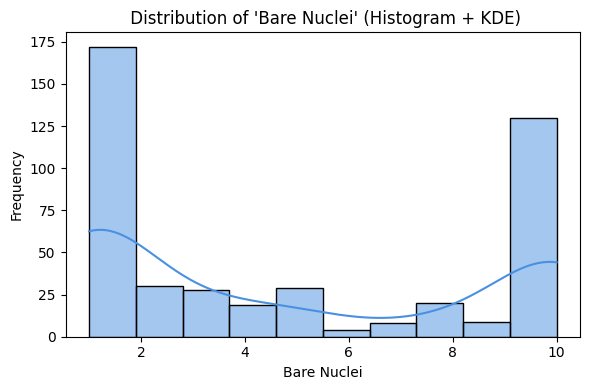

In [16]:
# Plot the distribution of 'Bare Nuclei' using histogram and KDE
# This helps assess whether the data is normally distributed or skewed,
# which informs the choice of imputation method (mean, median, or mode)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(df['Bare Nuclei'], bins=10, kde=True, color='#4a90e2')
plt.title(" Distribution of 'Bare Nuclei' (Histogram + KDE)")
plt.xlabel('Bare Nuclei')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

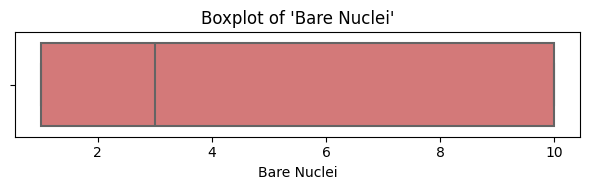

In [19]:
# Plot a boxplot to visually inspect outliers in 'Bare Nuclei'
# Outliers can strongly affect the mean, so if present, median or mode is preferred

plt.figure(figsize=(6, 2))
sns.boxplot(x=df['Bare Nuclei'], color='#e26a6a', linewidth=1.5)
plt.title("Boxplot of 'Bare Nuclei'")
plt.xlabel('Bare Nuclei')
plt.tight_layout()
plt.show()

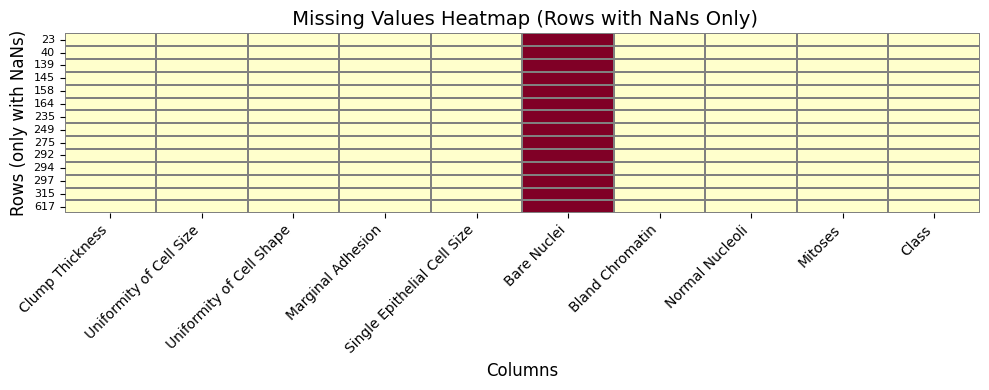

In [20]:
# Focused Missing Value Heatmap (only rows with NaNs labeled on y-axis)
# This version highlights only the rows that contain at least one missing value.
# It improves clarity by hiding fully complete rows from the heatmap.

import matplotlib.pyplot as plt
import seaborn as sns

# Filter rows that contain at least one NaN
missing_rows = df[df.isnull().any(axis=1)]

# Create the figure with a size that fits the reduced row count
plt.figure(figsize=(10, 4))

# Generate heatmap showing only missing entries
sns.heatmap(
    missing_rows.isnull(),     # Boolean mask of NaNs only
    cbar=False,                # Hide color bar for cleaner look
    cmap="YlOrRd",             # Use a yellow-to-red colormap to show intensity
    linewidths=0.3,            # Add light lines between cells
    linecolor='gray'           # Use gray for the grid lines
)

# Add titles and axis labels
plt.title(" Missing Values Heatmap (Rows with NaNs Only)", fontsize=14)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows (only with NaNs)", fontsize=12)

# Format tick labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=8)

# Final layout adjustment
plt.tight_layout()

# Show the plot
plt.show()

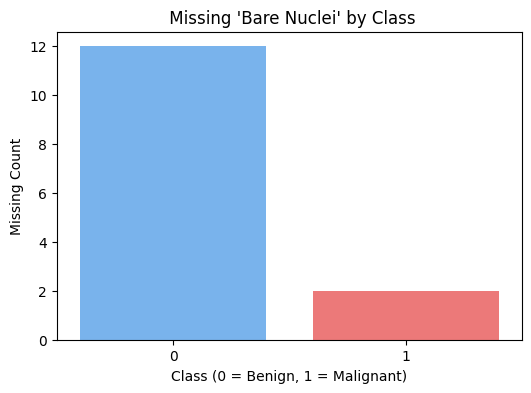

In [21]:
# Optional: Visualize missing 'Bare Nuclei' distribution across target classes

import numpy as np

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df[df['Bare Nuclei'].isnull()], palette=['#66b3ff', '#ff6666'])
plt.title(" Missing 'Bare Nuclei' by Class")
plt.xlabel("Class (0 = Benign, 1 = Malignant)")
plt.ylabel("Missing Count")
plt.show()

In [22]:
# Show descriptive statistics for numeric features
# This provides a summary (mean, std, min, max, quartiles)
# to understand the scale and distribution before normalization or outlier detection

print("Descriptive statistics for numeric features (before missing value imputation):")
df.describe()

Descriptive statistics for numeric features (before missing value imputation):


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,463.000000,463.000000,463.000000,463.000000,463.000000,449.000000,463.000000,463.000000,463.000000,463.000000
mean,5.323974,4.174946,4.239741,3.691145,3.840173,4.806236,4.170626,3.803456,1.885529,0.514039
std,2.873752,3.239645,3.121767,3.152280,2.446914,3.880509,2.639002,3.385452,2.043326,0.500343
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,5.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,10.000000,7.000000,7.000000,2.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [23]:
# Impute missing values in 'Bare Nuclei' with the mode (most frequent value)
# This is the best strategy based on distribution analysis and class balance
# Mode is preferred over mean or median due to the skewed distribution and heavy concentration near low values

# Calculate mode of the column (most frequent valid value)
mode_value = df['Bare Nuclei'].mode()[0]

# Fill missing values with mode
df['Bare Nuclei'].fillna(mode_value, inplace=True)

# Confirmation message
print(f"Missing values in 'Bare Nuclei' have been filled with mode: {mode_value}")

Missing values in 'Bare Nuclei' have been filled with mode: 1.0


In [24]:
# Check if all missing values in 'Bare Nuclei' have been successfully imputed

missing_after = df['Bare Nuclei'].isnull().sum()

if missing_after == 0:
    print("All missing values in 'Bare Nuclei' have been successfully filled.")
else:
    print(f"There are still {missing_after} missing values in 'Bare Nuclei'.")

All missing values in 'Bare Nuclei' have been successfully filled.


In [25]:
# Step: Show descriptive statistics for numeric features
# This provides a summary (mean, std, min, max, quartiles)
# to understand the scale and distribution before normalization or outlier detection

print("Descriptive statistics for numeric features (after missing value imputation):")
df.describe()

Descriptive statistics for numeric features (after missing value imputation):


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,5.323974,4.174946,4.239741,3.691145,3.840173,4.691145,4.170626,3.803456,1.885529,0.514039
std,2.873752,3.239645,3.121767,3.152280,2.446914,3.876568,2.639002,3.385452,2.043326,0.500343
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,5.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,10.000000,7.000000,7.000000,2.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


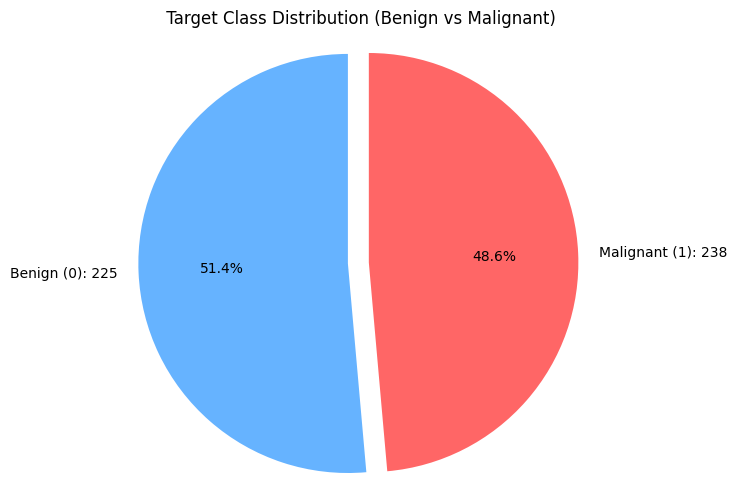

In [26]:
# Visualize the target class distribution using a pie chart (with counts and percentages)

import matplotlib.pyplot as plt

# Count class values
class_counts = df['Class'].value_counts()
labels = [f'Benign (0): {class_counts[0]}', f'Malignant (1): {class_counts[1]}']
colors = ['#66b3ff', '#ff6666']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=[0.05, 0.05])
plt.title(' Target Class Distribution (Benign vs Malignant)')
plt.axis('equal')  # Ensures pie chart is a circle
plt.show()

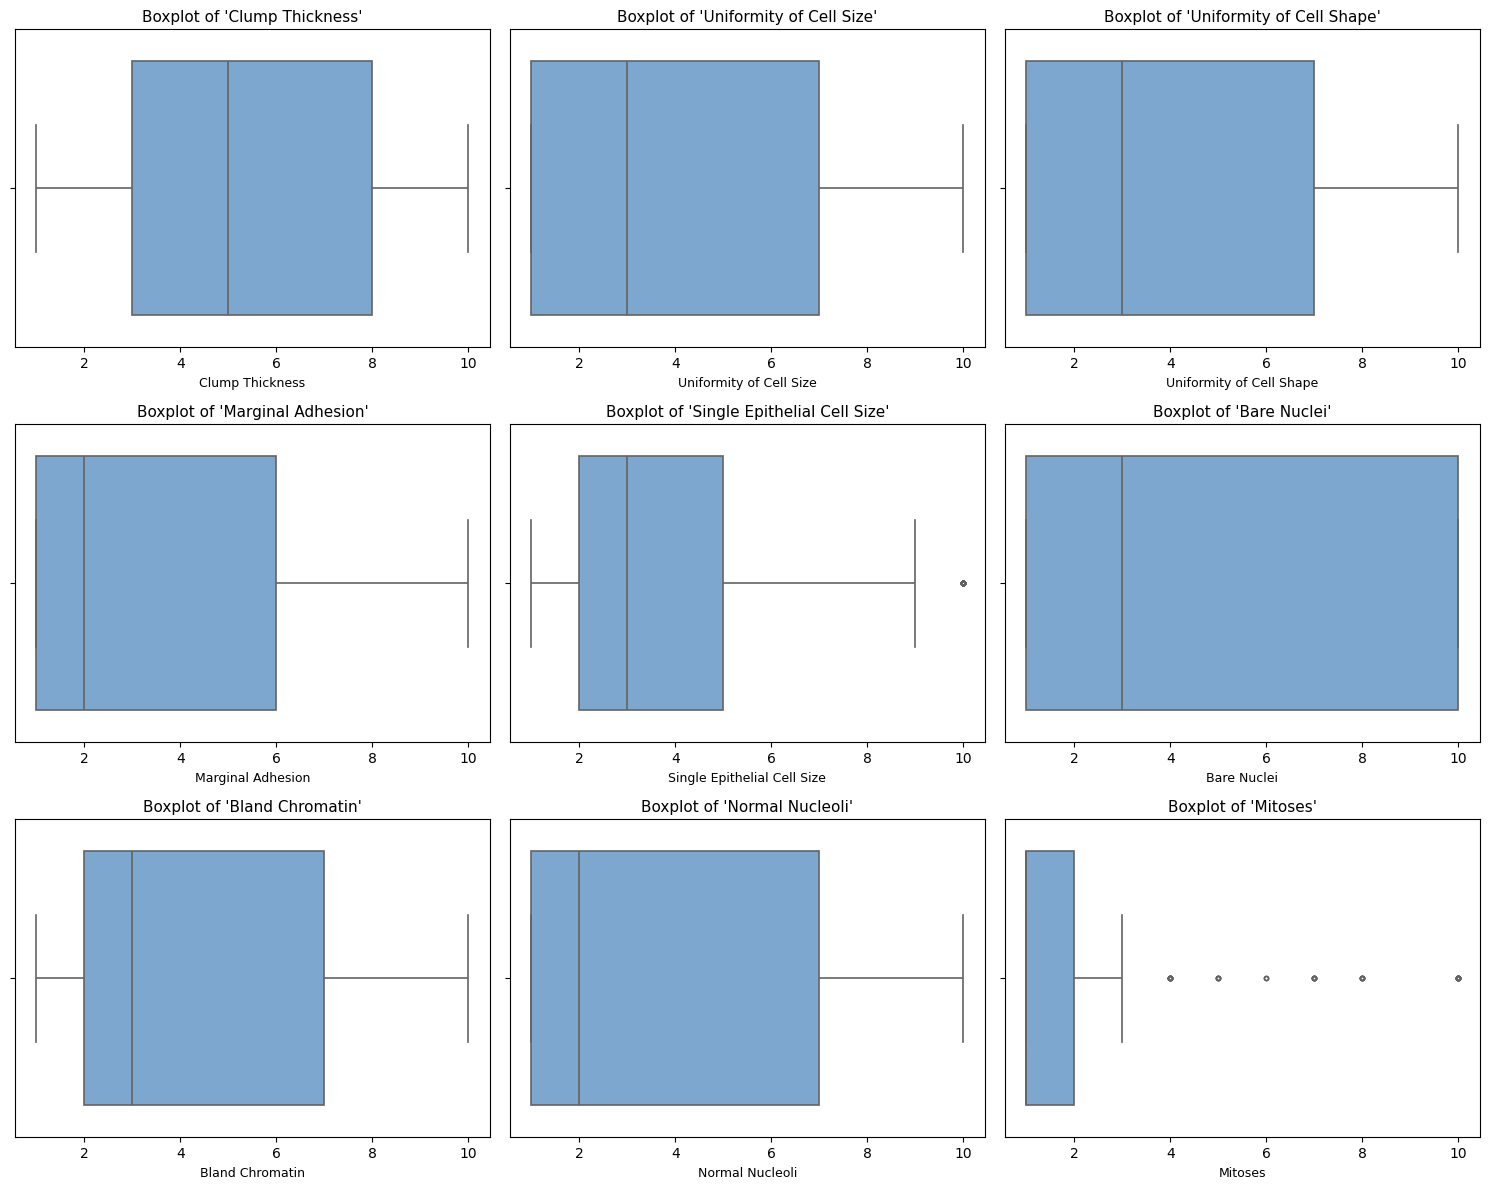

In [27]:
# Plot individual boxplots for each numeric feature to detect outliers accurately
# This method gives a detailed view of the distribution and extreme values for each feature

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numeric columns except the target
numeric_features = df.select_dtypes(include='number').drop(columns='Class').columns

# Set up grid layout dynamically
n_cols = 3
n_rows = int(np.ceil(len(numeric_features) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# Plot boxplot for each numeric feature
for i, col in enumerate(numeric_features):
    sns.boxplot(x=df[col], ax=axes[i], color='#6fa8dc', linewidth=1.2, fliersize=3)
    axes[i].set_title(f"Boxplot of '{col}'", fontsize=11)
    axes[i].set_xlabel(col, fontsize=9)
    axes[i].set_ylabel("")  # Remove y-labels for cleaner look

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Final layout adjustment
plt.tight_layout()
plt.show()

In [28]:
# IQR-Based Outlier Detection: Count + Percentage for Each Numeric Feature
# This block calculates both the total number and percentage of outliers using the IQR method
# and returns a clean summary table for easy interpretation.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize storage for outlier analysis
outlier_stats = []

# Loop through each numeric feature except the target
for col in df.drop(columns='Class').select_dtypes(include='number').columns:

    # Calculate Q1 and Q3 (25th and 75th percentiles)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Compute lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = 100 * outlier_count / len(df)

    # Append result to summary list
    outlier_stats.append({
        'Feature': col,
        'Outlier Count': outlier_count,
        'Outlier Percentage': round(outlier_percent, 2)
    })

# Create a DataFrame from the collected stats
outlier_summary_df = pd.DataFrame(outlier_stats)
outlier_summary_df = outlier_summary_df.sort_values(by='Outlier Count', ascending=False).reset_index(drop=True)

# Display the result table
print("IQR-Based Outlier Summary:")
display(outlier_summary_df)

IQR-Based Outlier Summary:


,Feature,Outlier Count,Outlier Percentage
0,Mitoses,52,11.23
1,Single Epithelial Cell Size,30,6.48
2,Clump Thickness,0,0.00
3,Uniformity of Cell Shape,0,0.00
4,Uniformity of Cell Size,0,0.00
5,Marginal Adhesion,0,0.00
6,Bare Nuclei,0,0.00
7,Bland Chromatin,0,0.00
8,Normal Nucleoli,0,0.00


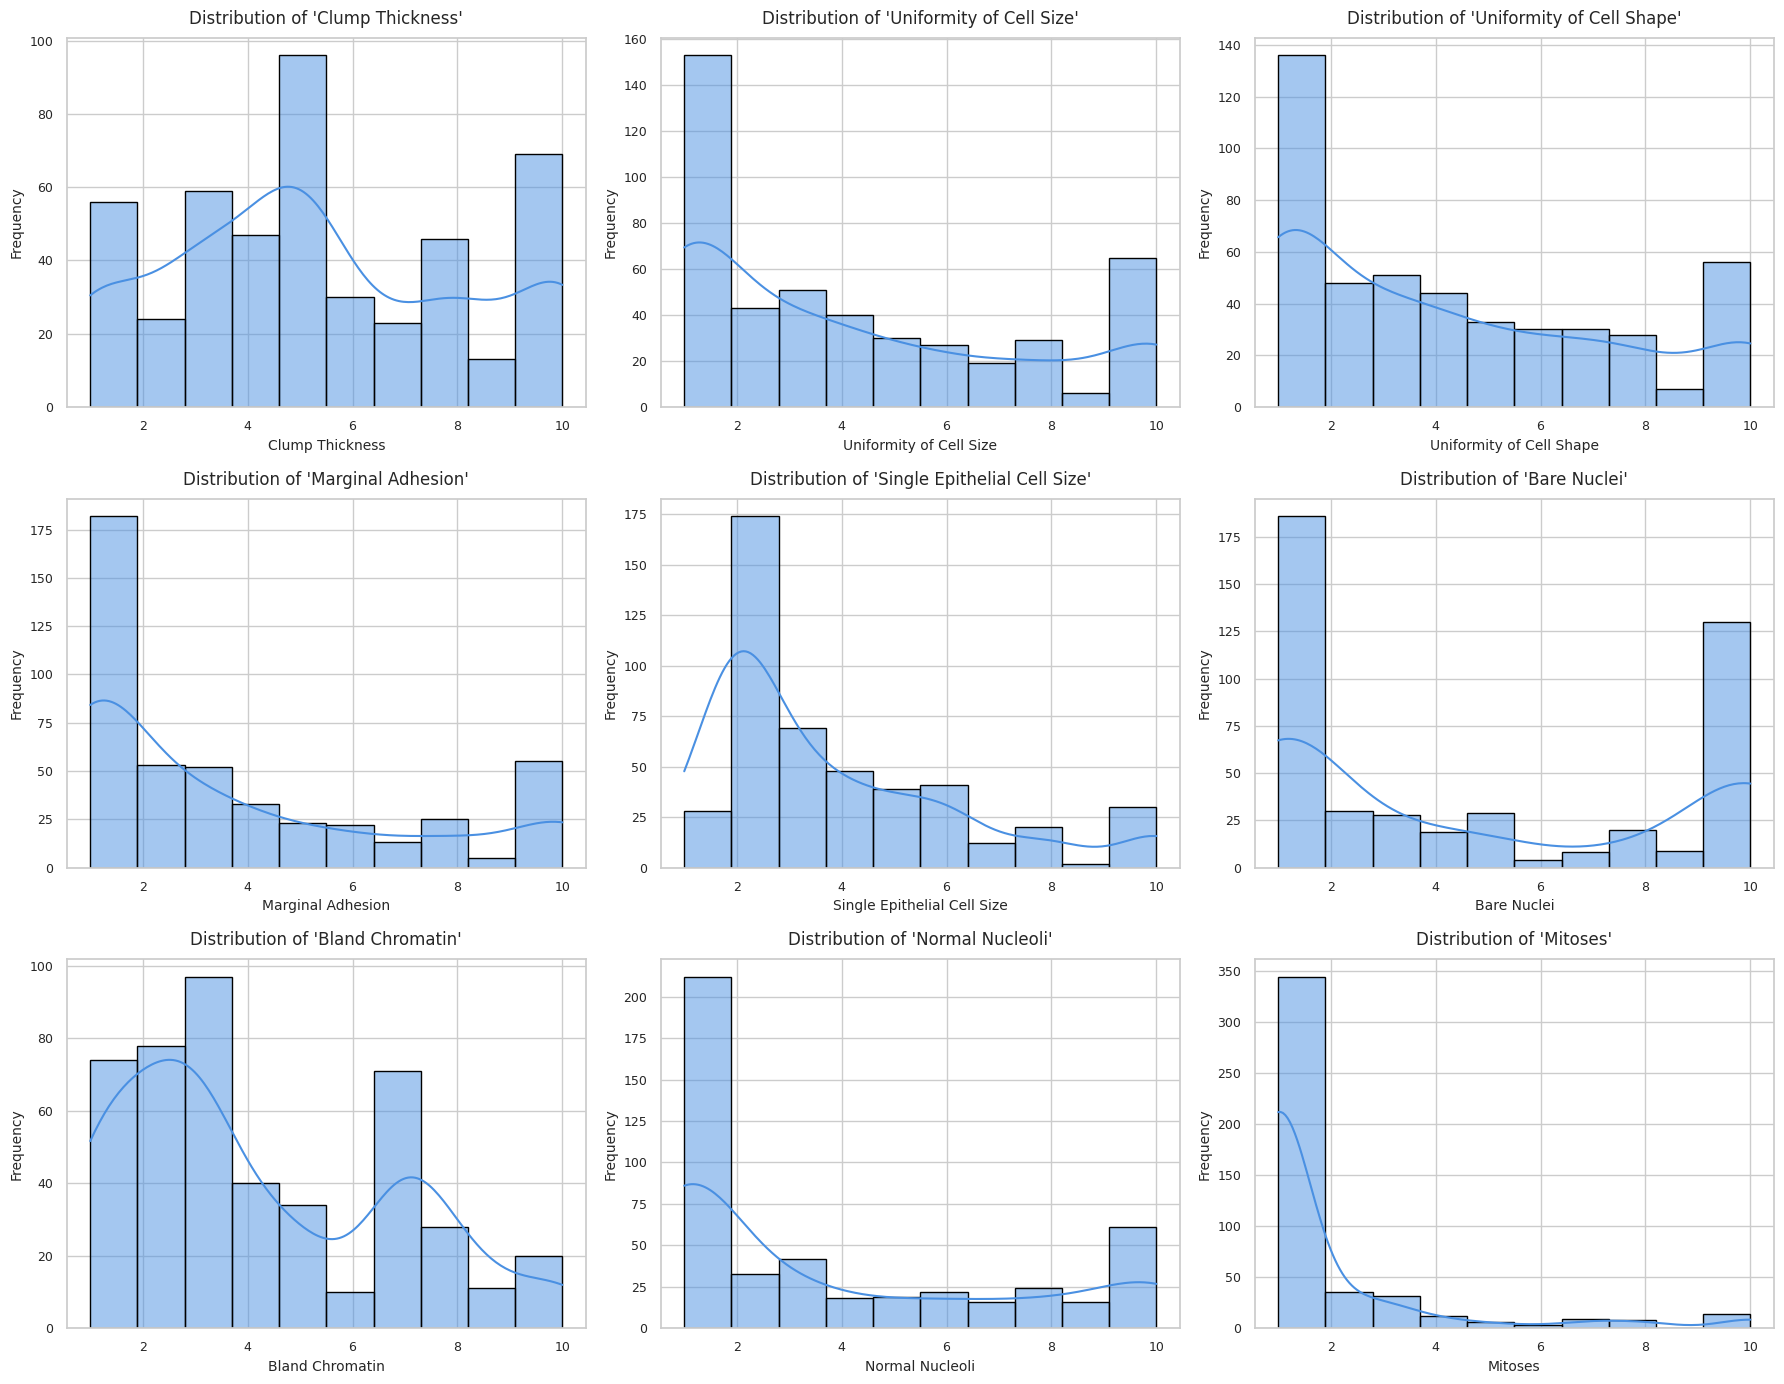

In [29]:
# Enhanced Histogram + KDE for Each Numeric Feature
# Clear visualization of distribution shape, skewness, and modality for all numeric features

import matplotlib.pyplot as plt
import seaborn as sns

# Set global style
sns.set(style="whitegrid")
numeric_cols = df.drop(columns='Class').select_dtypes(include='number').columns

# Create subplot grid
plt.figure(figsize=(18, 14))

# Loop through each numeric feature
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)

    # Plot histogram with KDE
    sns.histplot(df[col],
                 bins=10,
                 kde=True,
                 color="#4a90e2",
                 edgecolor="black")

    plt.title(f"Distribution of '{col}'", fontsize=12, pad=10)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)

# Show plot
plt.tight_layout()
plt.show()

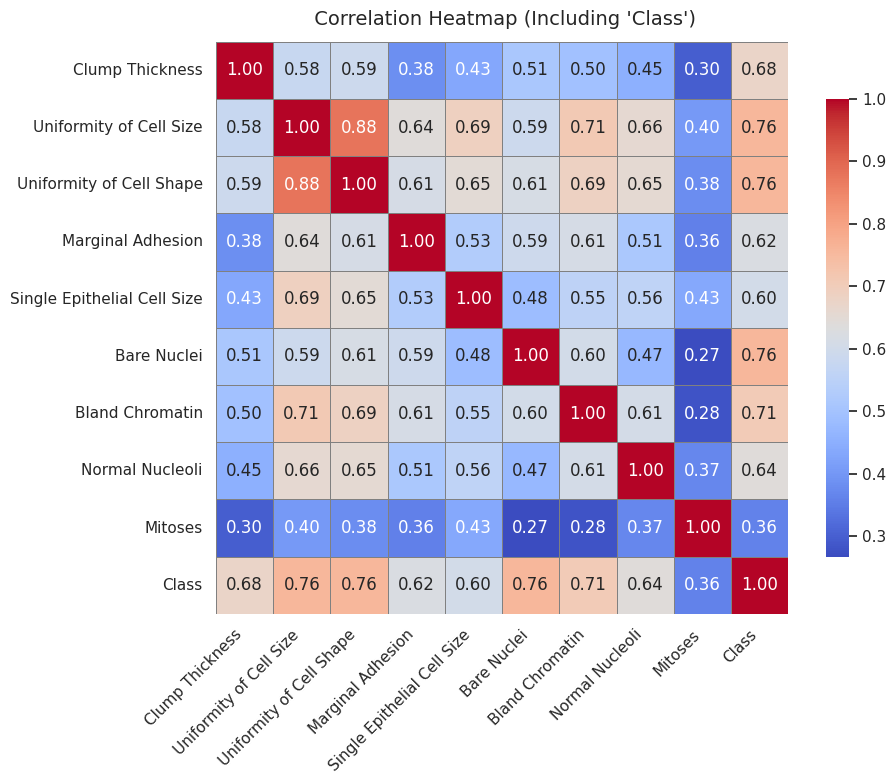

In [30]:
# Correlation Heatmap Including Target Variable 'Class'
# This reveals how each feature correlates with others, including the label

import matplotlib.pyplot as plt
import seaborn as sns

# Compute full correlation matrix including target 'Class'
corr_matrix = df.corr()

# Set figure and visual style
plt.figure(figsize=(10, 8))
sns.set(style="white")

# Plot heatmap with annotations
sns.heatmap(corr_matrix,
            annot=True,             # Display correlation coefficients
            fmt=".2f",              # Format to 2 decimal places
            cmap="coolwarm",        # Blue to red scale
            linewidths=0.5,
            linecolor='gray',
            square=True,
            cbar_kws={'shrink': .8})  # Shrink colorbar for cleaner layout

# Title and final formatting
plt.title(" Correlation Heatmap (Including 'Class')", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [32]:
# Z-Score Based Outlier Detection for Each Numeric Feature
# This code calculates the Z-score for all numeric features, flags values beyond ±3 as outliers,
# and summarizes both the count and percentage of outliers per feature.

import pandas as pd
import numpy as np
from scipy.stats import zscore

# Select numeric columns (excluding 'Class')
numeric_cols = df.drop(columns='Class').select_dtypes(include='number')

# Compute Z-scores
z_scores = numeric_cols.apply(zscore)

# Identify outliers and collect stats
z_summary = []
for col in numeric_cols.columns:
    outlier_mask = (np.abs(z_scores[col]) > 3)
    count = outlier_mask.sum()
    percent = round(100 * count / len(df), 2)
    z_summary.append({
        'Feature': col,
        'Outlier Count': count,
        'Outlier Percentage': percent
    })

# Create and display summary DataFrame
z_outlier_df = pd.DataFrame(z_summary)
z_outlier_df = z_outlier_df.sort_values(by='Outlier Count', ascending=False).reset_index(drop=True)
print("Z-Score Based Outlier Summary:")
display(z_outlier_df)

Z-Score Based Outlier Summary:


,Feature,Outlier Count,Outlier Percentage
0,Mitoses,14,3.02
1,Clump Thickness,0,0.00
2,Uniformity of Cell Size,0,0.00
3,Marginal Adhesion,0,0.00
4,Uniformity of Cell Shape,0,0.00
5,Single Epithelial Cell Size,0,0.00
6,Bare Nuclei,0,0.00
7,Bland Chromatin,0,0.00
8,Normal Nucleoli,0,0.00


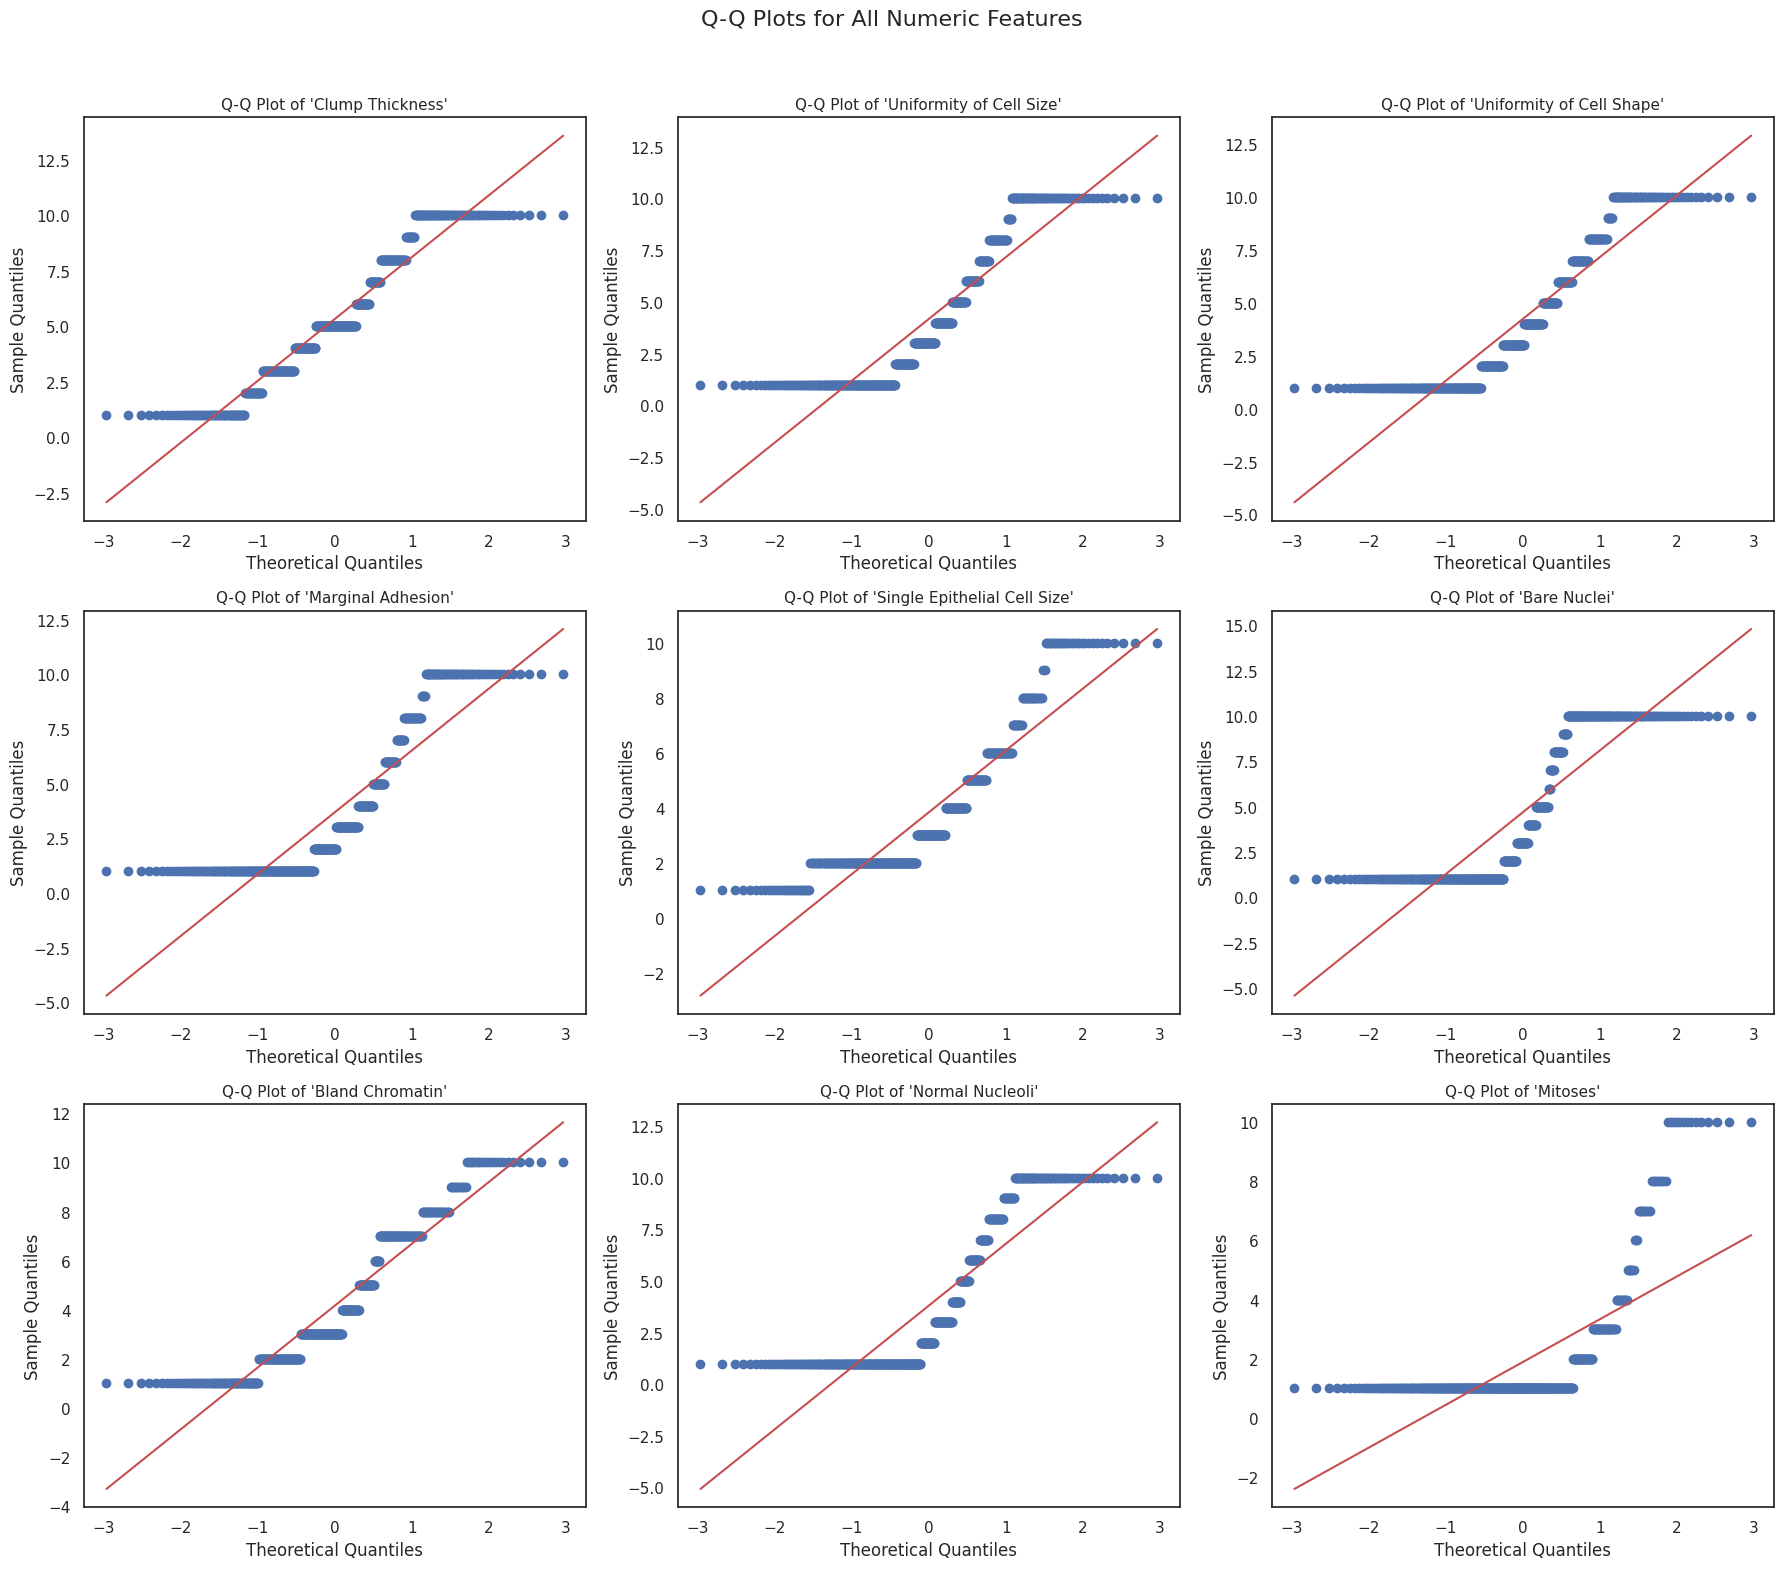

In [33]:
# Q-Q Plots for All Numeric Features (Normality Assessment)
# This helps assess whether each feature is normally distributed

import matplotlib.pyplot as plt
import scipy.stats as stats

# Select numeric features (excluding 'Class')
numeric_cols = df.drop(columns='Class').select_dtypes(include='number').columns

# Create subplots for all features
plt.figure(figsize=(18, 16))
plt.suptitle("Q-Q Plots for All Numeric Features", fontsize=16)

# Loop and plot
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of '{col}'", fontsize=11)
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

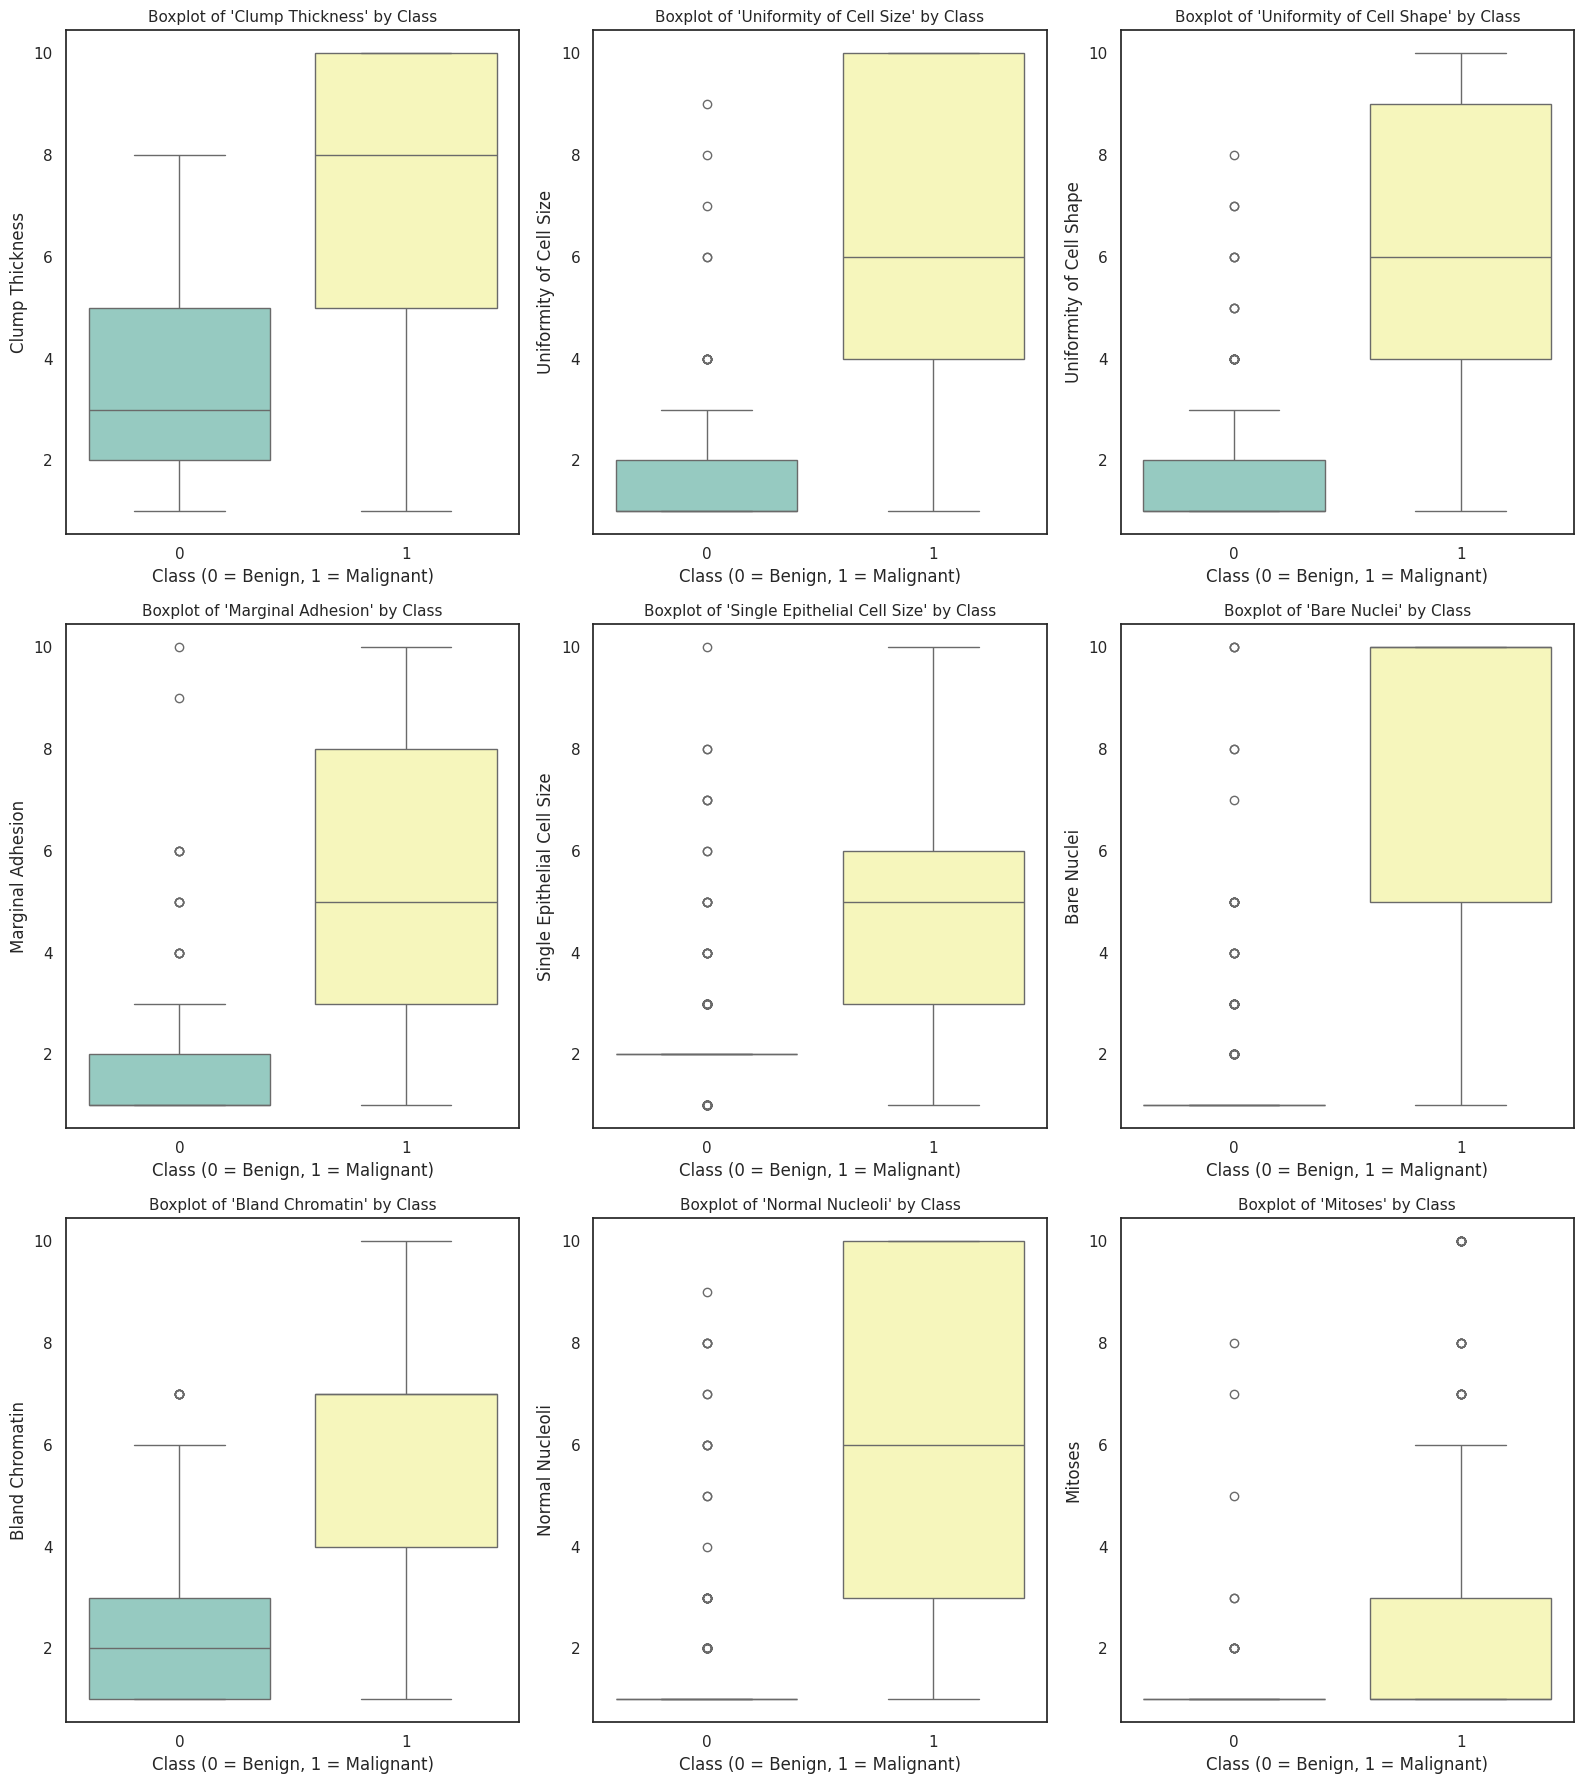

In [34]:
# Boxplot by Class for All Numeric Features
# This helps assess class-wise separation and spread of each feature

import matplotlib.pyplot as plt
import seaborn as sns

# Select all numeric features excluding the target
numeric_cols = df.drop(columns='Class').select_dtypes(include='number').columns

# Set up the subplot grid
plt.figure(figsize=(16, 18))
for i, feature in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Class', y=feature, data=df, palette='Set3')
    plt.title(f"Boxplot of '{feature}' by Class", fontsize=11)
    plt.xlabel("Class (0 = Benign, 1 = Malignant)")
    plt.ylabel(feature)

# Final layout
plt.tight_layout()
plt.show()

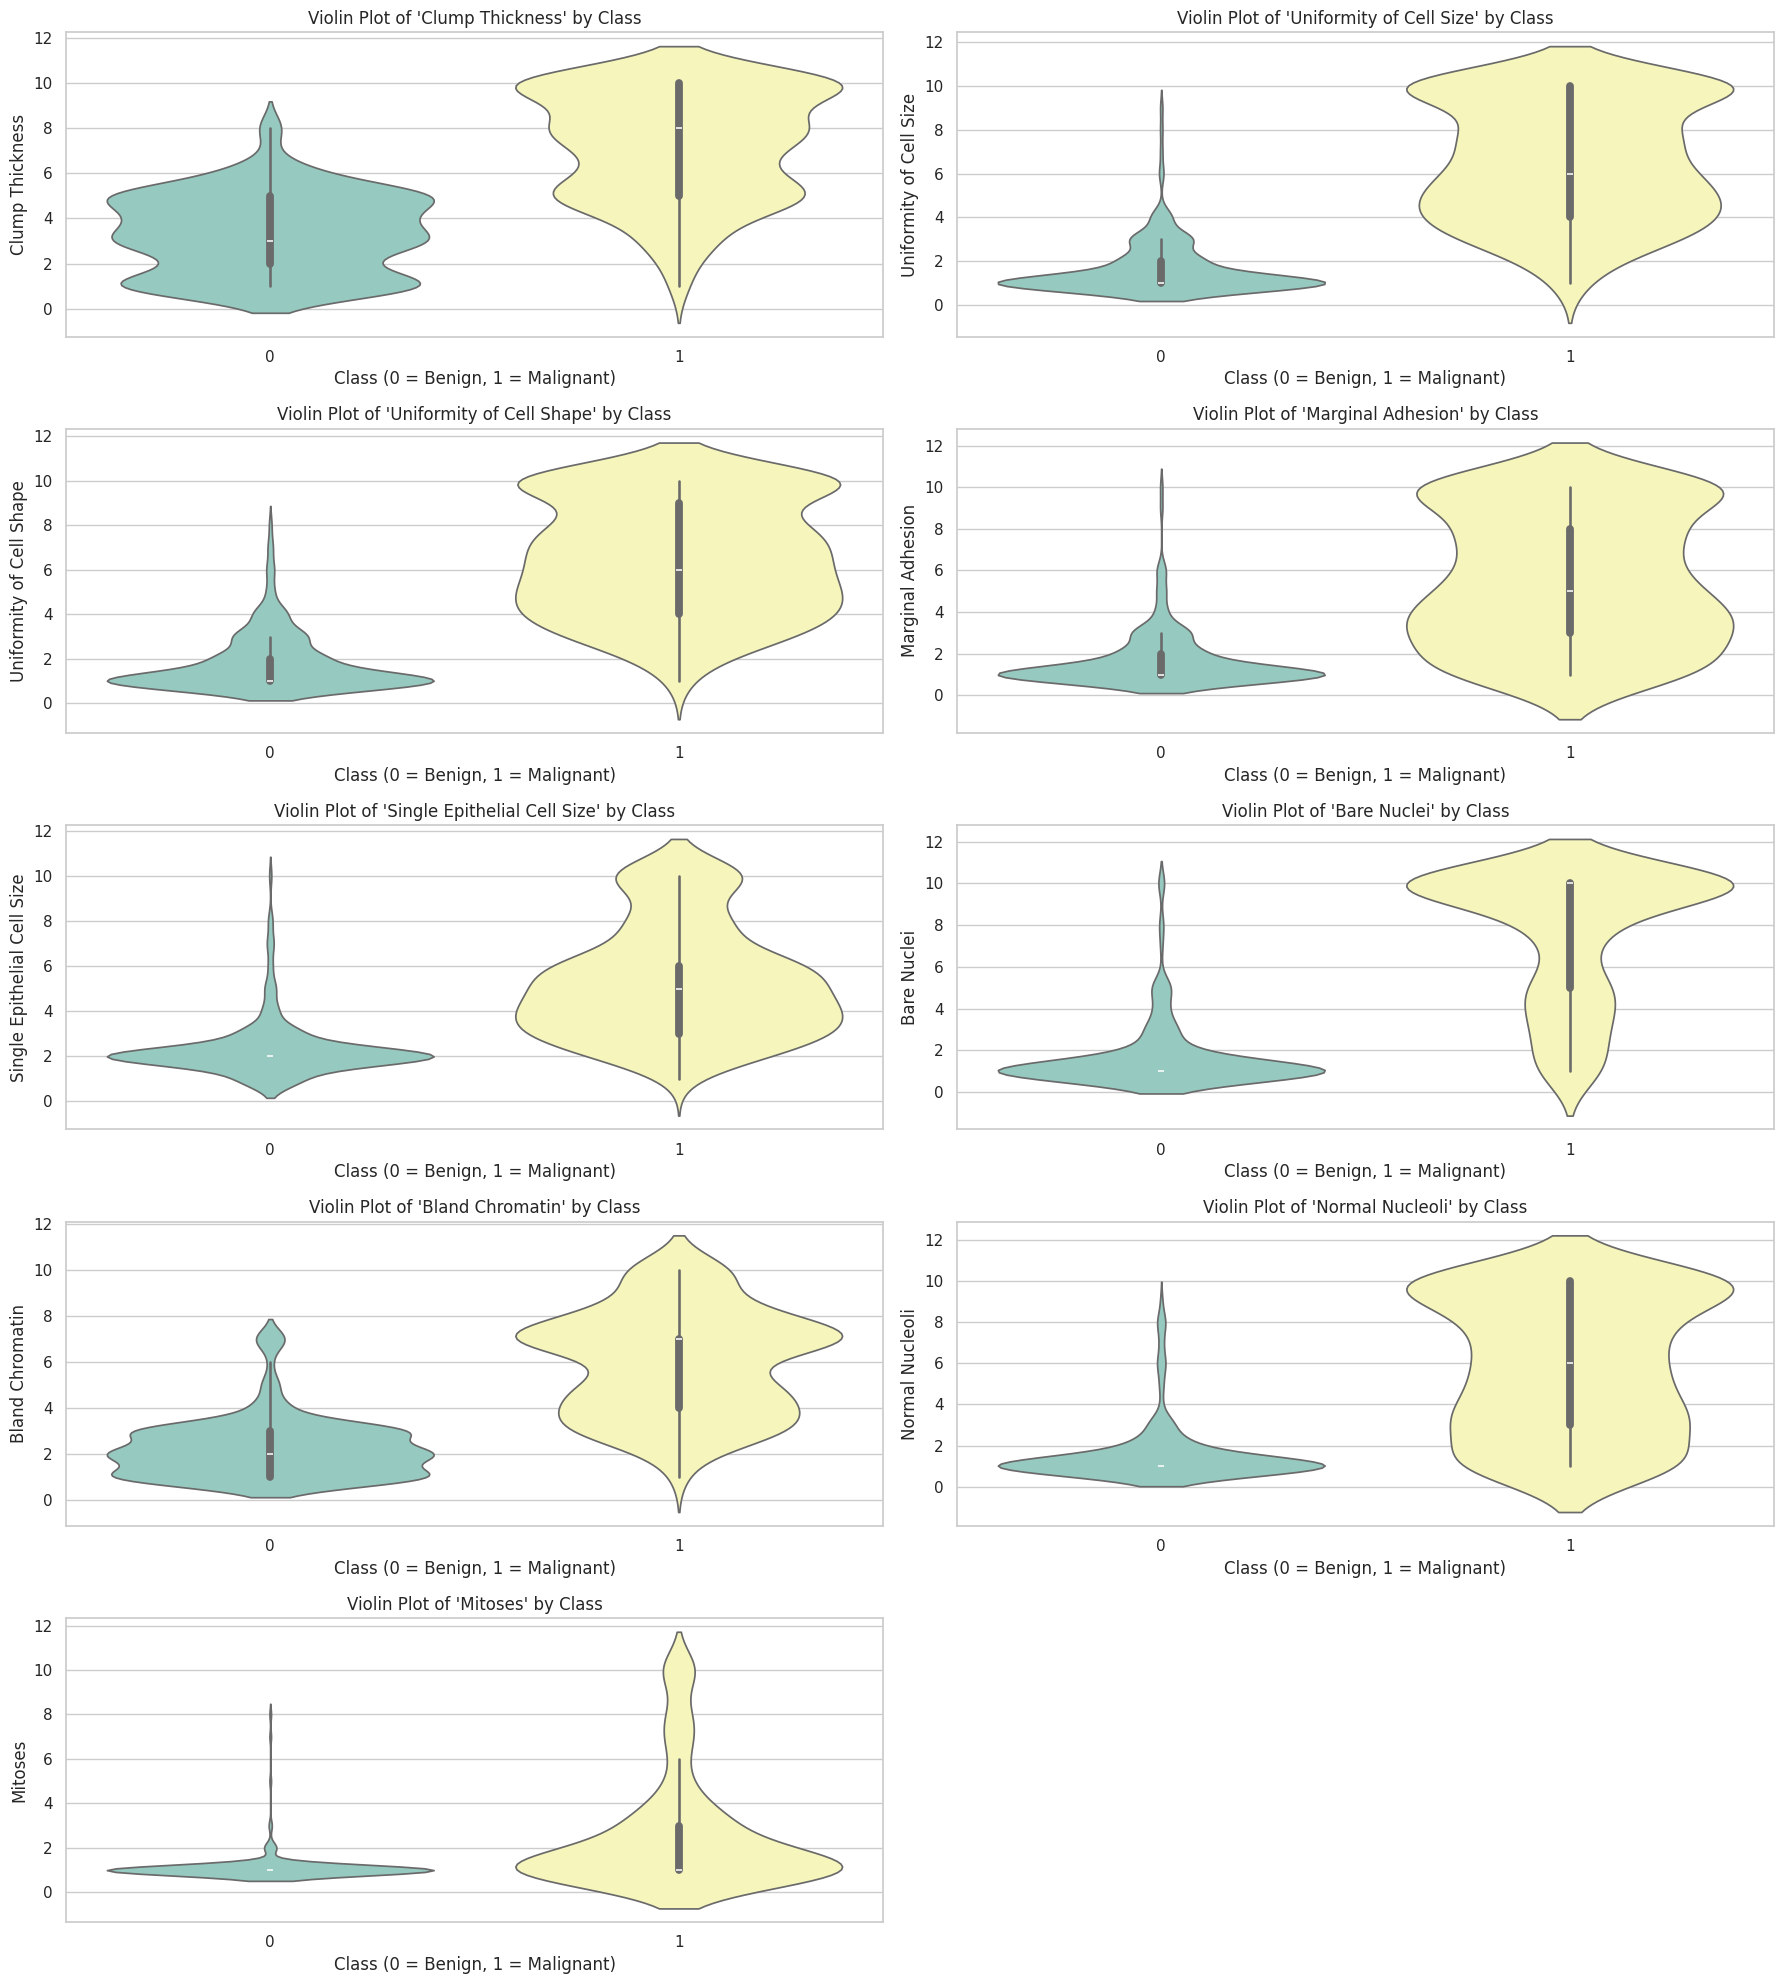

In [35]:
# Violin Plots: Visualize distribution + density + outliers by class
# This plot combines KDE, boxplot, and class split for deeper insight into feature distribution
# Especially useful to understand if outliers are specific to a particular class (e.g. malignant)

import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features excluding the target
numeric_cols = df.drop(columns='Class').select_dtypes(include='number').columns

# Set figure size and layout
plt.figure(figsize=(18, 20))
sns.set(style="whitegrid")

# Loop through features and plot violinplots
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    sns.violinplot(x='Class', y=col, data=df, palette='Set3', inner='box')
    plt.title(f"Violin Plot of '{col}' by Class", fontsize=12)
    plt.xlabel("Class (0 = Benign, 1 = Malignant)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Outlier Counts by Class (IQR Method):


,Feature,Outliers in Class 0,Outliers in Class 1,Total Outliers
0,Mitoses,3,49,52
1,Single Epithelial Cell Size,1,29,30
2,Clump Thickness,0,0,0
3,Uniformity of Cell Shape,0,0,0
4,Uniformity of Cell Size,0,0,0
5,Marginal Adhesion,0,0,0
6,Bare Nuclei,0,0,0
7,Bland Chromatin,0,0,0
8,Normal Nucleoli,0,0,0


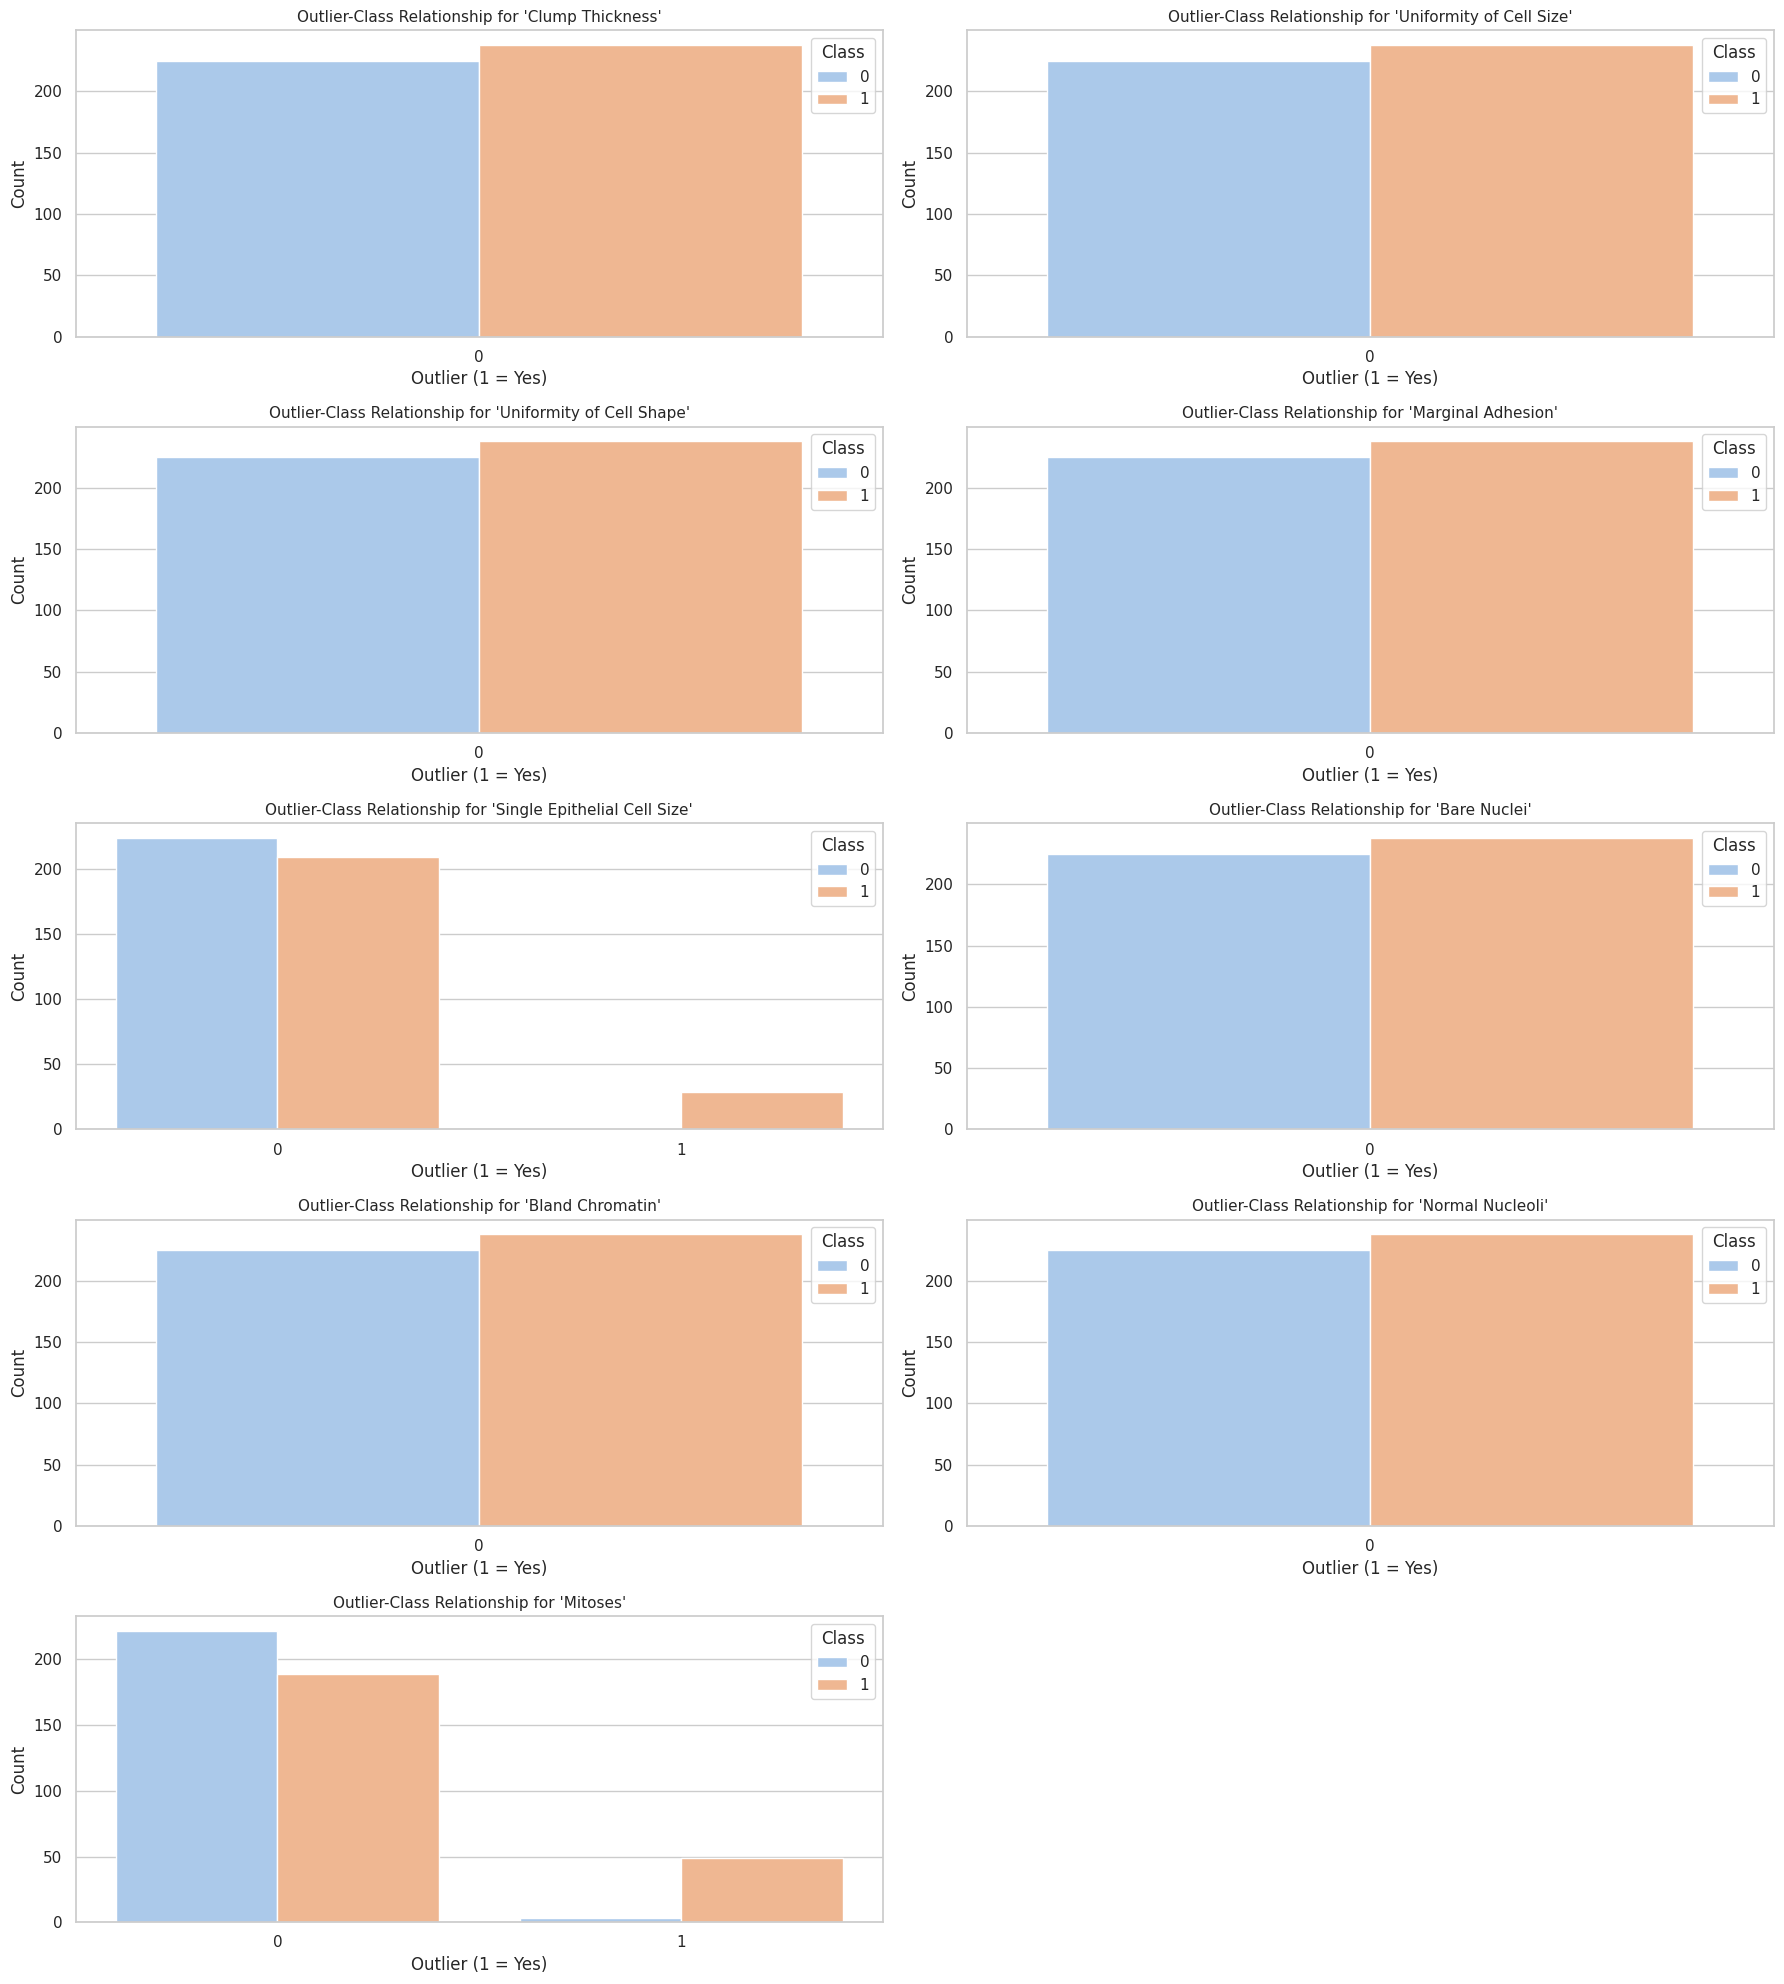

In [36]:
# Combined Outlier-Class Analysis (IQR Method – Full Automation)
# Count outliers by class for all numeric features
# Create binary outlier flags (0/1) for each feature using IQR
# Visualize outlier-class relationship using countplots

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dynamically identify all numeric features except the target
target_col = 'Class'
numeric_features = df.drop(columns=target_col).select_dtypes(include='number').columns

# Count outliers per class using IQR
outlier_class_counts = []

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower) | (df[feature] > upper)]

    count_0 = (outliers[target_col] == 0).sum()
    count_1 = (outliers[target_col] == 1).sum()

    outlier_class_counts.append({
        'Feature': feature,
        'Outliers in Class 0': count_0,
        'Outliers in Class 1': count_1,
        'Total Outliers': count_0 + count_1
    })

# Build summary DataFrame
outlier_by_class_df = pd.DataFrame(outlier_class_counts)
outlier_by_class_df = outlier_by_class_df.sort_values(by='Total Outliers', ascending=False).reset_index(drop=True)

# Display table
print("Outlier Counts by Class (IQR Method):")
display(outlier_by_class_df)


# Create binary outlier columns for all numeric features
df_flags = df.copy()
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_flags[f'{col}_outlier'] = ((df[col] < lower) | (df[col] > upper)).astype(int)

# Plot outlier-class breakdown using countplots
outlier_cols = [col for col in df_flags.columns if col.endswith('_outlier')]
n = len(outlier_cols)

plt.figure(figsize=(18, 4 * ((n + 1) // 2)))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot((n + 1) // 2, 2, i)
    sns.countplot(x=col, hue=target_col, data=df_flags, palette='pastel')
    plt.title(f"Outlier-Class Relationship for '{col.replace('_outlier','')}'", fontsize=11)
    plt.xlabel("Outlier (1 = Yes)")
    plt.ylabel("Count")
    plt.legend(title='Class')

plt.tight_layout()
plt.show()

In [37]:
# Apply MinMaxScaler to Normalize Features Between 0 and 1
# This is the official scaling step requested in the assignment

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Separate features and target
features = df.drop(columns='Class')  # Drop the target column
target = df['Class']                 # Keep the target column

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the feature data
scaled_features = scaler.fit_transform(features)

# Reconstruct the DataFrame with scaled values
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target column back to the scaled DataFrame
df_scaled['Class'] = target.values

# Now df_scaled contains normalized feature values (0 to 1) and the original 'Class'
# You can print or visualize to confirm
df_scaled.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,0


In [38]:
# Train-Test Split (After Min-Max Scaling)
# This step separates scaled features and labels,
# then splits the data into train/test while preserving class distribution.

from sklearn.model_selection import train_test_split

# Separate features and target
X = df_scaled.drop(columns='Class')  # Features: all columns except the target
y = df_scaled['Class']               # Target: 0 = benign, 1 = malignant

# Stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,           # Preserves class ratio in both train and test sets
    random_state=42,      # Ensures reproducibility
    shuffle=True          # Explicitly states shuffling (default=True)
)

# Display dataset dimensions
print(f"X_train shape: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test  shape: {X_test.shape}, y_test : {y_test.shape}")

X_train shape: (370, 9), y_train: (370,)
X_test  shape: (93, 9), y_test : (93,)


In [39]:
# Handle Class Imbalance with SMOTE (Train Set Only)
# This block applies SMOTE (Synthetic Minority Over-sampling Technique)
# to the training set only, in order to balance class distribution
# without leaking information into the test set.

from imblearn.over_sampling import SMOTE
from collections import Counter

# Check original class distribution in training data
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE to training data (X_train, y_train)
# Only the training set is oversampled — test data remains untouched
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Confirm class distribution after balancing
print("After SMOTE :", Counter(y_train_balanced))

# (Optional) Show new shape of balanced data
print(f"Balanced training set size: {X_train_balanced.shape}, {y_train_balanced.shape}")

Before SMOTE: Counter({1: 190, 0: 180})
After SMOTE : Counter({1: 190, 0: 190})
Balanced training set size: (380, 9), (380,)


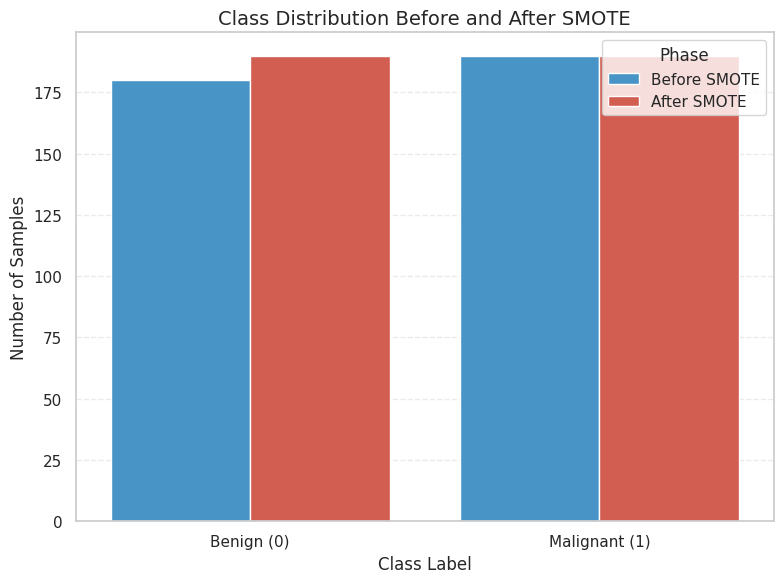

In [40]:
# Enhanced Visualization: Class Distribution Before vs After SMOTE
# Displays separate bars for each class (0, 1) before and after balancing

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for comparison
class_labels = ['Benign (0)', 'Malignant (1)']
before_counts = Counter(y_train)
after_counts = Counter(y_train_balanced)

df_plot = pd.DataFrame({
    'Class': class_labels * 2,
    'Count': [before_counts[0], before_counts[1], after_counts[0], after_counts[1]],
    'Phase': ['Before SMOTE'] * 2 + ['After SMOTE'] * 2
})

# Plot grouped bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=df_plot, x='Class', y='Count', hue='Phase', palette=['#3498db', '#e74c3c'])

# Annotate plot
plt.title("Class Distribution Before and After SMOTE", fontsize=14)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title="Phase", loc='upper right')
plt.tight_layout()
plt.show()

In [41]:
# 7-Fold Stratified Cross-Validation Setup
# Create a 7-fold stratified cross-validator to preserve class distribution across folds

from sklearn.model_selection import StratifiedKFold

# Define number of splits
n_splits = 7

# Initialize the StratifiedKFold object
skf = StratifiedKFold(
    n_splits=n_splits,     # Number of folds
    shuffle=True,          # Shuffle before splitting
    random_state=42        # Ensure reproducibility
)

# (Optional): Show fold split sizes for confirmation
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_balanced, y_train_balanced), 1):
    print(f"Fold {fold}: Train samples = {len(train_idx)}, Validation samples = {len(val_idx)}")

Fold 1: Train samples = 325, Validation samples = 55
Fold 2: Train samples = 325, Validation samples = 55
Fold 3: Train samples = 326, Validation samples = 54
Fold 4: Train samples = 326, Validation samples = 54
Fold 5: Train samples = 326, Validation samples = 54
Fold 6: Train samples = 326, Validation samples = 54
Fold 7: Train samples = 326, Validation samples = 54


In [42]:
# Train and Evaluate Perceptron with Full Metric Set (7-Fold Stratified CV)
# This block trains a simple Perceptron using 7-fold stratified cross-validation
# and evaluates the model using key classification metrics

from sklearn.linear_model import Perceptron
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, fbeta_score, roc_auc_score
)
import numpy as np
import pandas as pd

# Initialize Perceptron model and cross-validator
perceptron = Perceptron(random_state=42)
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Prepare dictionary to collect metrics for each fold
cv_scores = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'F2 Score': [],
    'AUC': []
}

# Perform 7-fold stratified cross-validation
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_balanced, y_train_balanced), 1):
    # Split training and validation sets
    X_tr, X_val = X_train_balanced.iloc[train_idx], X_train_balanced.iloc[val_idx]
    y_tr, y_val = y_train_balanced.iloc[train_idx], y_train_balanced.iloc[val_idx]

    # Train the model
    perceptron.fit(X_tr, y_tr)

    # Predict class labels and decision scores
    y_pred = perceptron.predict(X_val)
    y_score = perceptron.decision_function(X_val)

    # Collect evaluation metrics
    cv_scores['Accuracy'].append(accuracy_score(y_val, y_pred))
    cv_scores['Precision'].append(precision_score(y_val, y_pred))
    cv_scores['Recall'].append(recall_score(y_val, y_pred))
    cv_scores['F1 Score'].append(f1_score(y_val, y_pred))
    cv_scores['F2 Score'].append(fbeta_score(y_val, y_pred, beta=2))
    cv_scores['AUC'].append(roc_auc_score(y_val, y_score))

# Summarize and display average metrics across all folds
summary_df = pd.DataFrame({
    'Metric': list(cv_scores.keys()),
    'Mean Score': [round(np.mean(values), 4) for values in cv_scores.values()]
})

print("Perceptron Evaluation over 7 Stratified Folds:\n")
display(summary_df)

# Save results for comparison with other models
perceptron_cv_df = summary_df.copy()

Perceptron Evaluation over 7 Stratified Folds:



,Metric,Mean Score
0,Accuracy,0.9024
1,Precision,0.9170
2,Recall,0.8995
3,F1 Score,0.8902
4,F2 Score,0.8932
5,AUC,0.9918


Final Evaluation of Perceptron on Test Set:



,Metric,Test Set Score
0,Accuracy,0.9032
1,Precision,0.8421
2,Recall,1.0000
3,F1 Score,0.9143
4,F2 Score,0.9639
5,AUC,0.9884


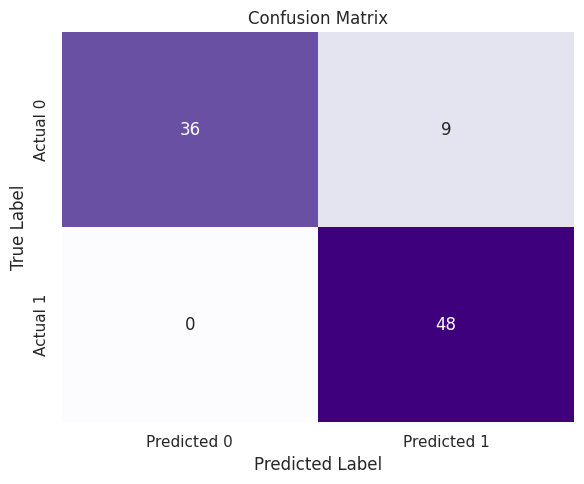

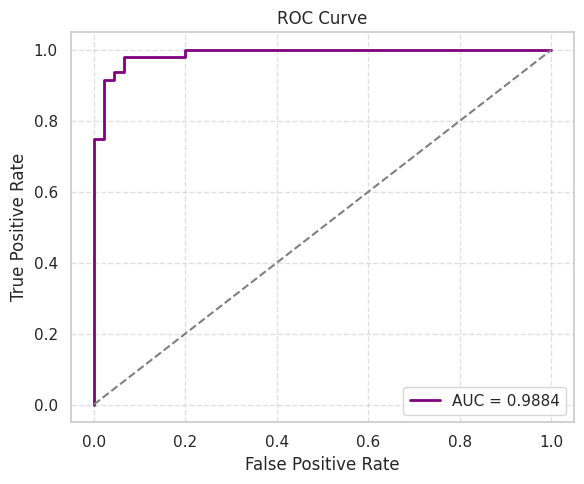

In [43]:
# Final Evaluation of Perceptron on Test Set
# Train the Perceptron model on the entire balanced training set and evaluate on the untouched test set

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, fbeta_score, roc_auc_score, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Train the model on the full balanced training data
perceptron.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_test_pred = perceptron.predict(X_test)
y_test_score = perceptron.decision_function(X_test)  # Raw scores for ROC/AUC

# Calculate evaluation metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1 Score': f1_score(y_test, y_test_pred),
    'F2 Score': fbeta_score(y_test, y_test_pred, beta=2),
    'AUC': roc_auc_score(y_test, y_test_score)
}

# Create and display summary DataFrame
results_df_perceptron = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Test Set Score'])
results_df_perceptron['Test Set Score'] = results_df_perceptron['Test Set Score'].round(4)

print("Final Evaluation of Perceptron on Test Set:\n")
display(results_df_perceptron)

# Plot the confusion matrix (color: PuRd)
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Plot the ROC curve (color: purple)
fpr, tpr, _ = roc_curve(y_test, y_test_score)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {metrics['AUC']:.4f}", linewidth=2, color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [44]:
# Hyperparameter Tuning for MLPClassifier using GridSearchCV (7-Fold Stratified CV)

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define base MLP model
# max_iter is increased to ensure convergence across parameter settings
mlp_base = MLPClassifier(max_iter=1000, random_state=42)

# Define hyperparameter search space
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (64, 32)],  # Number and size of hidden layers
    'mlp__activation': ['relu', 'tanh'],                   # Activation function
    'mlp__alpha': [0.0001, 0.001, 0.01],                    # L2 regularization (weight decay)
    'mlp__learning_rate_init': [0.001, 0.01]               # Initial learning rate
}

# Define pipeline with preprocessing and classifier
# Scaling is important for MLPs; Pipeline ensures it happens inside each fold
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp_base)
])

# Set up GridSearchCV with 7-Fold CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',               # Use F1 score to balance precision and recall
    cv=7,                       # 7-fold stratified cross-validation
    n_jobs=-1,                  # Use all available CPU cores
    verbose=2                   # Detailed progress output
)

# Run the search on the balanced training set
grid_search.fit(X_train_balanced, y_train_balanced)

# Display best parameter combination found
print("Best Parameters Found via GridSearchCV:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

# Extract best MLP model from the search
mlp = grid_search.best_estimator_

Fitting 7 folds for each of 36 candidates, totalling 252 fits
Best Parameters Found via GridSearchCV:
mlp__activation: tanh
mlp__alpha: 0.0001
mlp__hidden_layer_sizes: (50,)
mlp__learning_rate_init: 0.001


In [45]:
# Train and Evaluate Tuned MLPClassifier with Full Metric Set (7-Fold Stratified CV)

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, fbeta_score, roc_auc_score
)
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

# Initialize 7-fold stratified cross-validator
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Initialize dictionary to store fold-wise metrics
cv_scores = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'F2 Score': [],
    'AUC': []
}

# Loop through each fold and evaluate the tuned MLP
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_balanced, y_train_balanced), 1):
    X_tr, X_val = X_train_balanced.iloc[train_idx], X_train_balanced.iloc[val_idx]
    y_tr, y_val = y_train_balanced.iloc[train_idx], y_train_balanced.iloc[val_idx]

    # Train the best MLP model found via GridSearch
    mlp.fit(X_tr, y_tr)

    # Predict labels and probability scores
    y_pred = mlp.predict(X_val)
    y_score = mlp.predict_proba(X_val)[:, 1]

    # Collect all required metrics
    cv_scores['Accuracy'].append(accuracy_score(y_val, y_pred))
    cv_scores['Precision'].append(precision_score(y_val, y_pred))
    cv_scores['Recall'].append(recall_score(y_val, y_pred))
    cv_scores['F1 Score'].append(f1_score(y_val, y_pred))
    cv_scores['F2 Score'].append(fbeta_score(y_val, y_pred, beta=2))
    cv_scores['AUC'].append(roc_auc_score(y_val, y_score))

# Calculate mean scores across folds and display results
mlp_cv_df = pd.DataFrame({
    'Metric': list(cv_scores.keys()),
    'Mean Score': [round(np.mean(cv_scores[m]), 6) for m in cv_scores]
})

print("Tuned MLPClassifier Evaluation Across 7 Stratified Folds:\n")
display(mlp_cv_df)

Tuned MLPClassifier Evaluation Across 7 Stratified Folds:



,Metric,Mean Score
0,Accuracy,0.947379
1,Precision,0.952507
2,Recall,0.948035
3,F1 Score,0.947605
4,F2 Score,0.947236
5,AUC,0.991805


Final Evaluation of Tuned MLPClassifier on Test Set:



,Metric,Test Set Score
0,Accuracy,0.9462
1,Precision,0.9388
2,Recall,0.9583
3,F1 Score,0.9485
4,F2 Score,0.9544
5,AUC,0.9880


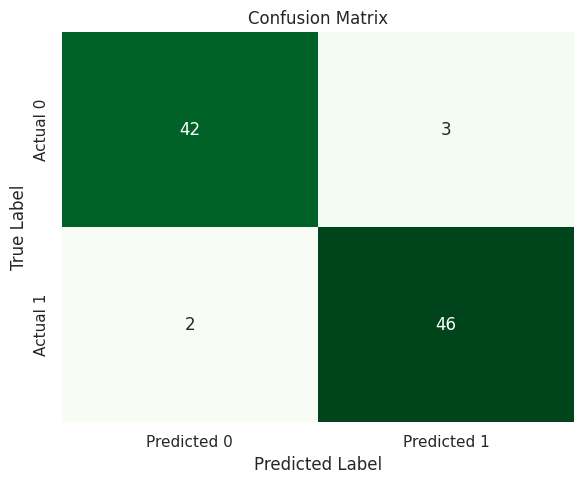

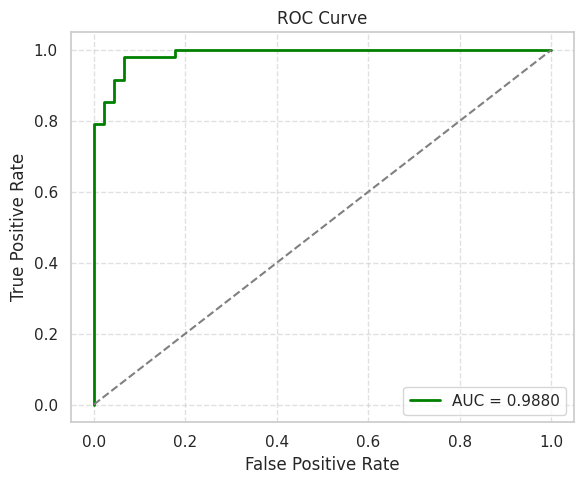

In [46]:
# Final Evaluation of Tuned MLPClassifier on Test Set
# Evaluate the best model from GridSearchCV on the untouched test set

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, fbeta_score, roc_auc_score, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assumption: mlp = grid_search.best_estimator_

# Train tuned MLPClassifier on the full balanced training set
mlp.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_test_pred = mlp.predict(X_test)
y_test_score = mlp.predict_proba(X_test)[:, 1]  # For AUC and ROC

# Compute evaluation metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1 Score': f1_score(y_test, y_test_pred),
    'F2 Score': fbeta_score(y_test, y_test_pred, beta=2),
    'AUC': roc_auc_score(y_test, y_test_score)
}

# Save result in a specific variable for comparison
results_df_mlp = pd.DataFrame(metrics.items(), columns=['Metric', 'Test Set Score'])
results_df_mlp['Test Set Score'] = results_df_mlp['Test Set Score'].round(4)

# Display results
print("Final Evaluation of Tuned MLPClassifier on Test Set:\n")
display(results_df_mlp)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_score)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {metrics['AUC']:.4f}", linewidth=2, color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [47]:
# Compare 7-Fold Cross-Validation Results of Perceptron and Tuned MLPClassifier

import pandas as pd

# Combine results
cv_comparison = pd.DataFrame({
    'Metric': perceptron_cv_df['Metric'],
    'Perceptron (CV)': perceptron_cv_df['Mean Score'],
    'Tuned MLP (CV)': mlp_cv_df['Mean Score']
})

# Apply dynamic background gradient for better visual comparison
styled_cv = cv_comparison.style \
    .set_caption("Mean Cross-Validation Scores (7-Fold Stratified)") \
    .format(precision=4) \
    .background_gradient(subset=['Perceptron (CV)', 'Tuned MLP (CV)'], cmap='YlGnBu') \
    .set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])

# Display styled DataFrame
styled_cv

,Metric,Perceptron (CV),Tuned MLP (CV)
0,Accuracy,0.9024,0.9474
1,Precision,0.9170,0.9525
2,Recall,0.8995,0.9480
3,F1 Score,0.8902,0.9476
4,F2 Score,0.8932,0.9472
5,AUC,0.9918,0.9918


In [48]:
# Compare Final Test Set Results of Perceptron and Tuned MLPClassifier

import pandas as pd

# Combine test set evaluation results into one comparison table
test_comparison = pd.DataFrame({
    'Metric': results_df_perceptron['Metric'],
    'Perceptron (Test)': results_df_perceptron['Test Set Score'],
    'Tuned MLP (Test)': results_df_mlp['Test Set Score']
})

# Style the table for better visual impact
styled_test = test_comparison.style \
    .set_caption("Final Evaluation on Test Set (Perceptron vs. Tuned MLP)") \
    .format(precision=4) \
    .background_gradient(subset=['Perceptron (Test)', 'Tuned MLP (Test)'], cmap='BuGn') \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])

# Display the styled table
styled_test

,Metric,Perceptron (Test),Tuned MLP (Test)
0,Accuracy,0.9032,0.9462
1,Precision,0.8421,0.9388
2,Recall,1.0000,0.9583
3,F1 Score,0.9143,0.9485
4,F2 Score,0.9639,0.9544
5,AUC,0.9884,0.9880


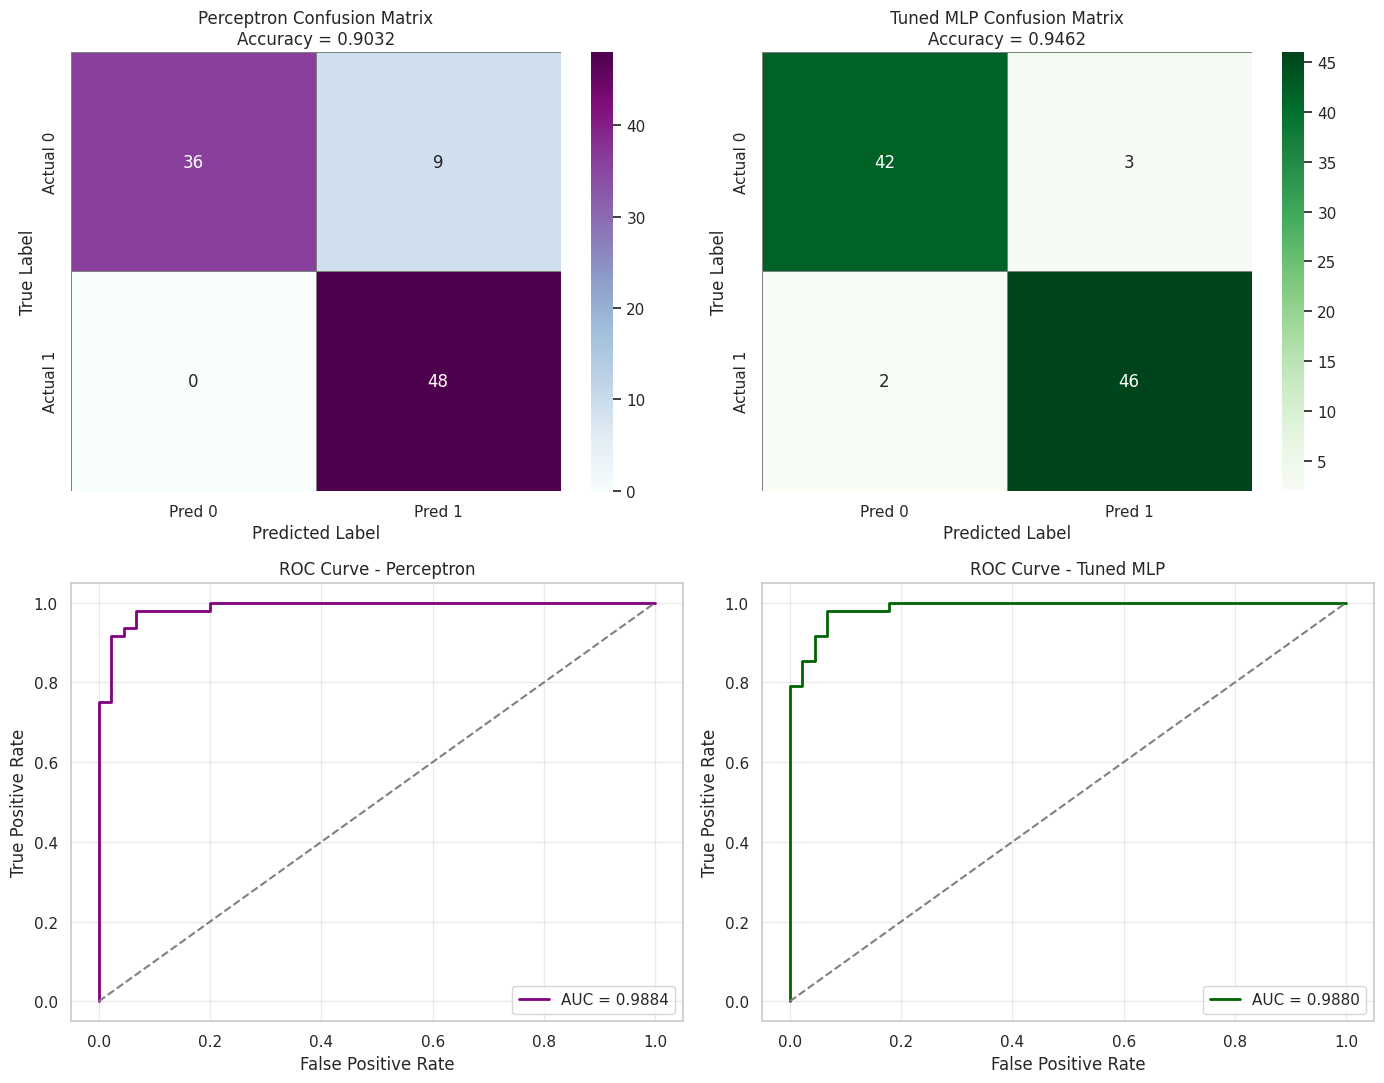

In [49]:
# Compare ROC Curves and Confusion Matrices (Perceptron vs. Tuned MLPClassifier)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

# Generate predictions and scores
y_pred_perc = perceptron.predict(X_test)
y_score_perc = perceptron.decision_function(X_test)

y_pred_mlp = mlp.predict(X_test)
y_score_mlp = mlp.predict_proba(X_test)[:, 1]

# Compute confusion matrices
conf_perc = confusion_matrix(y_test, y_pred_perc)
conf_mlp = confusion_matrix(y_test, y_pred_mlp)

# Compute ROC curves and AUC
fpr_perc, tpr_perc, _ = roc_curve(y_test, y_score_perc)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_score_mlp)
auc_perc = auc(fpr_perc, tpr_perc)
auc_mlp = auc(fpr_mlp, tpr_mlp)

# Compute accuracy for titles
acc_perc = accuracy_score(y_test, y_pred_perc)
acc_mlp = accuracy_score(y_test, y_pred_mlp)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(14, 11))

# Top-Left: Perceptron Confusion Matrix
sns.heatmap(conf_perc, annot=True, fmt='d', cmap='BuPu', linewidths=0.5, linecolor='gray',
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axs[0, 0])
axs[0, 0].set_title(f"Perceptron Confusion Matrix\nAccuracy = {acc_perc:.4f}")
axs[0, 0].set_xlabel("Predicted Label")
axs[0, 0].set_ylabel("True Label")

# Top-Right: MLP Confusion Matrix
sns.heatmap(conf_mlp, annot=True, fmt='d', cmap='Greens', linewidths=0.5, linecolor='gray',
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axs[0, 1])
axs[0, 1].set_title(f"Tuned MLP Confusion Matrix\nAccuracy = {acc_mlp:.4f}")
axs[0, 1].set_xlabel("Predicted Label")
axs[0, 1].set_ylabel("True Label")

# Bottom-Left: Perceptron ROC Curve
axs[1, 0].plot(fpr_perc, tpr_perc, label=f"AUC = {auc_perc:.4f}", color='purple', linewidth=2)
axs[1, 0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axs[1, 0].set_title("ROC Curve - Perceptron")
axs[1, 0].set_xlabel("False Positive Rate")
axs[1, 0].set_ylabel("True Positive Rate")
axs[1, 0].legend(loc="lower right")
axs[1, 0].grid(alpha=0.4)

# Bottom-Right: Tuned MLP ROC Curve
axs[1, 1].plot(fpr_mlp, tpr_mlp, label=f"AUC = {auc_mlp:.4f}", color='darkgreen', linewidth=2)
axs[1, 1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axs[1, 1].set_title("ROC Curve - Tuned MLP")
axs[1, 1].set_xlabel("False Positive Rate")
axs[1, 1].set_ylabel("True Positive Rate")
axs[1, 1].legend(loc="lower right")
axs[1, 1].grid(alpha=0.4)

# Adjust layout
plt.tight_layout()
plt.show()

In [50]:
# Convert Preprocessed and Balanced DataFrames to PyTorch Tensors
# This step normalizes feature vectors to [0, 1] using MinMaxScaler,
# and converts both features and target labels to PyTorch tensors for training with MLP.

import torch
from sklearn.preprocessing import MinMaxScaler

# Normalize input features using MinMaxScaler (fit only on training data to avoid data leakage)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)  # Fit on SMOTE-balanced training data
X_test_scaled = scaler.transform(X_test)                 # Apply the same scaler to untouched test data

# Convert scaled features to PyTorch tensors (dtype must be float32 for PyTorch models)
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

# Convert binary class labels to PyTorch tensors and reshape to (n_samples, 1)
y_train_tensor = torch.tensor(y_train_balanced.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# At this point, both training and test data are ready for feeding into a PyTorch model

In [51]:
#  Define a flexible MLP model class in PyTorch
# This class supports configurable number of hidden layers, customizable activation functions,
# and produces sigmoid output for binary classification.

import torch.nn as nn
import torch.nn.functional as F

class FlexibleMLP(nn.Module):
    def __init__(self, input_dim, hidden_layers, hidden_units, activation):
        """
        input_dim     : int, number of input features
        hidden_layers : int, number of hidden layers
        hidden_units  : int, number of neurons per hidden layer
        activation    : str, 'tanh' or 'leaky_relu'
        """
        super(FlexibleMLP, self).__init__()

        # Set activation function based on input string
        if activation == 'tanh':
            self.activation_fn = torch.tanh
        elif activation == 'leaky_relu':
            self.activation_fn = F.leaky_relu
        else:
            raise ValueError("Unsupported activation function. Use 'tanh' or 'leaky_relu'.")

        # Dynamically create hidden layers
        self.hidden = nn.ModuleList()
        last_dim = input_dim
        for _ in range(hidden_layers):
            self.hidden.append(nn.Linear(last_dim, hidden_units))
            last_dim = hidden_units

        # Final output layer: 1 neuron for binary classification
        self.output = nn.Linear(last_dim, 1)

    def forward(self, x):
        # Pass input through hidden layers with activation
        for layer in self.hidden:
            x = self.activation_fn(layer(x))
        # Output layer uses sigmoid to return probability
        return torch.sigmoid(self.output(x))

In [52]:
# Define reusable training and evaluation functions for the FlexibleMLP model

import torch
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, fbeta_score
)

def train_model(model, optimizer, criterion, X_train, y_train, epochs=100):
    """
    Trains the PyTorch model using full-batch gradient descent.

    model     : instance of FlexibleMLP
    optimizer : torch.optim object
    criterion : loss function (e.g., nn.BCELoss)
    X_train   : torch.Tensor of input features
    y_train   : torch.Tensor of labels (shape: [n_samples, 1])
    epochs    : number of epochs to train
    """
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()                   # Reset gradients
        outputs = model(X_train)                # Forward pass
        loss = criterion(outputs, y_train)      # Compute loss
        loss.backward()                         # Backward pass
        optimizer.step()                        # Update weights
    return model


def evaluate_model(model, X_eval, y_eval):
    """
    Evaluates a trained model and computes multiple classification metrics.

    model   : trained FlexibleMLP instance
    X_eval  : torch.Tensor of evaluation features
    y_eval  : torch.Tensor of true labels (shape: [n_samples, 1])
    return  : dictionary of evaluation metrics
    """
    model.eval()
    with torch.no_grad():
        y_prob = model(X_eval)                      # Get predicted probabilities (sigmoid outputs)
        y_pred = (y_prob >= 0.5).float()            # Convert to binary labels using threshold

        # Convert tensors to NumPy arrays
        y_true_np = y_eval.numpy()
        y_pred_np = y_pred.numpy()
        y_prob_np = y_prob.numpy()

        # Compute metrics
        metrics = {
            'Accuracy' : accuracy_score(y_true_np, y_pred_np),
            'Precision': precision_score(y_true_np, y_pred_np),
            'Recall'   : recall_score(y_true_np, y_pred_np),
            'F1 Score' : f1_score(y_true_np, y_pred_np),
            'F2 Score' : fbeta_score(y_true_np, y_pred_np, beta=2),
            'AUC'      : roc_auc_score(y_true_np, y_prob_np)
        }

    return metrics

In [53]:
# Evaluate 16 MLP models on TRAIN set

import torch.nn as nn
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score

hidden_layer_options = [1, 3]
hidden_unit_options = [16, 32]
activation_functions = ['tanh', 'leaky_relu']
learning_rates = [0.001, 0.01]

# Store training results
train_results = []

for num_layers in hidden_layer_options:
    for num_units in hidden_unit_options:
        for activation in activation_functions:
            for lr in learning_rates:

                # Build model
                model = FlexibleMLP(
                    input_dim=X_train_tensor.shape[1],
                    hidden_layers=num_layers,
                    hidden_units=num_units,
                    activation=activation
                )

                optimizer = torch.optim.Adam(model.parameters(), lr=lr)
                criterion = nn.BCELoss()

                # Train
                trained_model = train_model(
                    model, optimizer, criterion,
                    X_train_tensor, y_train_tensor, epochs=100
                )

                # Predict on training set
                trained_model.eval()
                with torch.no_grad():
                    y_prob = trained_model(X_train_tensor).numpy()
                    y_pred = (y_prob >= 0.5).astype(int)
                    y_true = y_train_tensor.numpy()

                # Compute train metrics
                metrics = {
                    'Accuracy' : accuracy_score(y_true, y_pred),
                    'Precision': precision_score(y_true, y_pred),
                    'Recall'   : recall_score(y_true, y_pred),
                    'F1 Score' : f1_score(y_true, y_pred),
                    'F2 Score' : fbeta_score(y_true, y_pred, beta=2),
                    'AUC'      : roc_auc_score(y_true, y_prob)
                }

                metrics.update({
                    'Hidden Layers': num_layers,
                    'Hidden Units' : num_units,
                    'Activation'   : activation,
                    'Learning Rate': lr
                })

                train_results.append(metrics)

# Display train results
train_df = pd.DataFrame(train_results)
train_df = train_df[[
    'Hidden Layers', 'Hidden Units', 'Activation', 'Learning Rate',
    'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'
]]
print(" Training Set Results for All 16 MLP Models:")
display(train_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True))

 Training Set Results for All 16 MLP Models:


,Hidden Layers,Hidden Units,Activation,Learning Rate,Accuracy,Precision,Recall,F1 Score,F2 Score,AUC
0,3,32,leaky_relu,0.010,0.978947,0.978947,0.978947,0.978947,0.978947,0.998726
1,3,16,leaky_relu,0.010,0.971053,0.949749,0.994737,0.971722,0.985401,0.994044
2,3,32,tanh,0.010,0.965789,0.953846,0.978947,0.966234,0.973822,0.993601
3,3,16,tanh,0.010,0.963158,0.948980,0.978947,0.963731,0.972803,0.992299
4,1,32,tanh,0.001,0.957895,0.922330,1.000000,0.959596,0.983437,0.987175
5,3,16,tanh,0.001,0.955263,0.939086,0.973684,0.956072,0.966562,0.985734
6,1,32,leaky_relu,0.010,0.955263,0.948187,0.963158,0.955614,0.960126,0.992715
7,1,32,tanh,0.010,0.955263,0.948187,0.963158,0.955614,0.960126,0.992327
8,3,32,tanh,0.001,0.955263,0.948187,0.963158,0.955614,0.960126,0.991219
9,1,16,tanh,0.010,0.955263,0.952880,0.957895,0.955381,0.956887,0.992188


In [54]:
# Evaluate 16 MLP models on TEST set

# Store test results
test_results = []

for num_layers in hidden_layer_options:
    for num_units in hidden_unit_options:
        for activation in activation_functions:
            for lr in learning_rates:

                # Build model
                model = FlexibleMLP(
                    input_dim=X_train_tensor.shape[1],
                    hidden_layers=num_layers,
                    hidden_units=num_units,
                    activation=activation
                )

                optimizer = torch.optim.Adam(model.parameters(), lr=lr)
                criterion = nn.BCELoss()

                # Train
                trained_model = train_model(
                    model, optimizer, criterion,
                    X_train_tensor, y_train_tensor, epochs=100
                )

                # Predict on test set
                trained_model.eval()
                with torch.no_grad():
                    y_prob = trained_model(X_test_tensor).numpy()
                    y_pred = (y_prob >= 0.5).astype(int)
                    y_true = y_test_tensor.numpy()

                # Compute test metrics
                metrics = {
                    'Accuracy' : accuracy_score(y_true, y_pred),
                    'Precision': precision_score(y_true, y_pred),
                    'Recall'   : recall_score(y_true, y_pred),
                    'F1 Score' : f1_score(y_true, y_pred),
                    'F2 Score' : fbeta_score(y_true, y_pred, beta=2),
                    'AUC'      : roc_auc_score(y_true, y_prob)
                }

                metrics.update({
                    'Hidden Layers': num_layers,
                    'Hidden Units' : num_units,
                    'Activation'   : activation,
                    'Learning Rate': lr
                })

                test_results.append(metrics)

# Display test results
test_df = pd.DataFrame(test_results)
test_df = test_df[[
    'Hidden Layers', 'Hidden Units', 'Activation', 'Learning Rate',
    'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'
]]
print("Test Set Results for All 16 MLP Models:")
display(test_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True))

Test Set Results for All 16 MLP Models:


,Hidden Layers,Hidden Units,Activation,Learning Rate,Accuracy,Precision,Recall,F1 Score,F2 Score,AUC
0,1,32,leaky_relu,0.001,0.946237,0.921569,0.979167,0.949495,0.967078,0.985185
1,1,16,tanh,0.010,0.946237,0.938776,0.958333,0.948454,0.954357,0.987963
2,1,32,tanh,0.010,0.946237,0.938776,0.958333,0.948454,0.954357,0.986574
3,1,16,leaky_relu,0.010,0.946237,0.938776,0.958333,0.948454,0.954357,0.987037
4,1,32,leaky_relu,0.010,0.946237,0.938776,0.958333,0.948454,0.954357,0.986111
5,3,16,leaky_relu,0.010,0.946237,0.938776,0.958333,0.948454,0.954357,0.986111
6,3,16,tanh,0.010,0.946237,0.938776,0.958333,0.948454,0.954357,0.975463
7,3,16,tanh,0.001,0.946237,0.938776,0.958333,0.948454,0.954357,0.987037
8,3,32,leaky_relu,0.001,0.946237,0.938776,0.958333,0.948454,0.954357,0.987037
9,3,32,tanh,0.010,0.946237,0.938776,0.958333,0.948454,0.954357,0.981481


In [55]:
# Merge train and test results side-by-side for comparison

# Merge both DataFrames based on hyperparameter combinations
comparison_df = pd.merge(
    train_df,
    test_df,
    on=['Hidden Layers', 'Hidden Units', 'Activation', 'Learning Rate'],
    suffixes=('_Train', '_Test')
)

# Rearrange columns for clarity
cols_order = [
    'Hidden Layers', 'Hidden Units', 'Activation', 'Learning Rate',
    'Accuracy_Train', 'Accuracy_Test',
    'Precision_Train', 'Precision_Test',
    'Recall_Train', 'Recall_Test',
    'F1 Score_Train', 'F1 Score_Test',
    'F2 Score_Train', 'F2 Score_Test',
    'AUC_Train', 'AUC_Test'
]

comparison_df = comparison_df[cols_order]

# Sort by F1 Score on Test set
print("Side-by-Side Comparison of Train vs. Test Metrics for 16 MLP Models (Sorted by Test F1 Score):")
display(comparison_df.sort_values(by='F1 Score_Test', ascending=False).reset_index(drop=True))

Side-by-Side Comparison of Train vs. Test Metrics for 16 MLP Models (Sorted by Test F1 Score):


,Hidden Layers,Hidden Units,Activation,Learning Rate,Accuracy_Train,Accuracy_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,F1 Score_Train,F1 Score_Test,F2 Score_Train,F2 Score_Test,AUC_Train,AUC_Test
0,1,32,leaky_relu,0.001,0.947368,0.946237,0.904762,0.921569,1.000000,0.979167,0.950000,0.949495,0.979381,0.967078,0.986122,0.985185
1,1,16,tanh,0.010,0.955263,0.946237,0.952880,0.938776,0.957895,0.958333,0.955381,0.948454,0.956887,0.954357,0.992188,0.987963
2,1,32,tanh,0.010,0.955263,0.946237,0.948187,0.938776,0.963158,0.958333,0.955614,0.948454,0.960126,0.954357,0.992327,0.986574
3,1,16,leaky_relu,0.010,0.950000,0.946237,0.952381,0.938776,0.947368,0.958333,0.949868,0.948454,0.948367,0.954357,0.991662,0.987037
4,1,32,leaky_relu,0.010,0.955263,0.946237,0.948187,0.938776,0.963158,0.958333,0.955614,0.948454,0.960126,0.954357,0.992715,0.986111
5,3,16,leaky_relu,0.010,0.971053,0.946237,0.949749,0.938776,0.994737,0.958333,0.971722,0.948454,0.985401,0.954357,0.994044,0.986111
6,3,16,tanh,0.010,0.963158,0.946237,0.948980,0.938776,0.978947,0.958333,0.963731,0.948454,0.972803,0.954357,0.992299,0.975463
7,3,16,tanh,0.001,0.955263,0.946237,0.939086,0.938776,0.973684,0.958333,0.956072,0.948454,0.966562,0.954357,0.985734,0.987037
8,3,32,leaky_relu,0.001,0.950000,0.946237,0.947644,0.938776,0.952632,0.958333,0.950131,0.948454,0.951630,0.954357,0.990720,0.987037
9,3,32,tanh,0.010,0.965789,0.946237,0.953846,0.938776,0.978947,0.958333,0.966234,0.948454,0.973822,0.954357,0.993601,0.981481


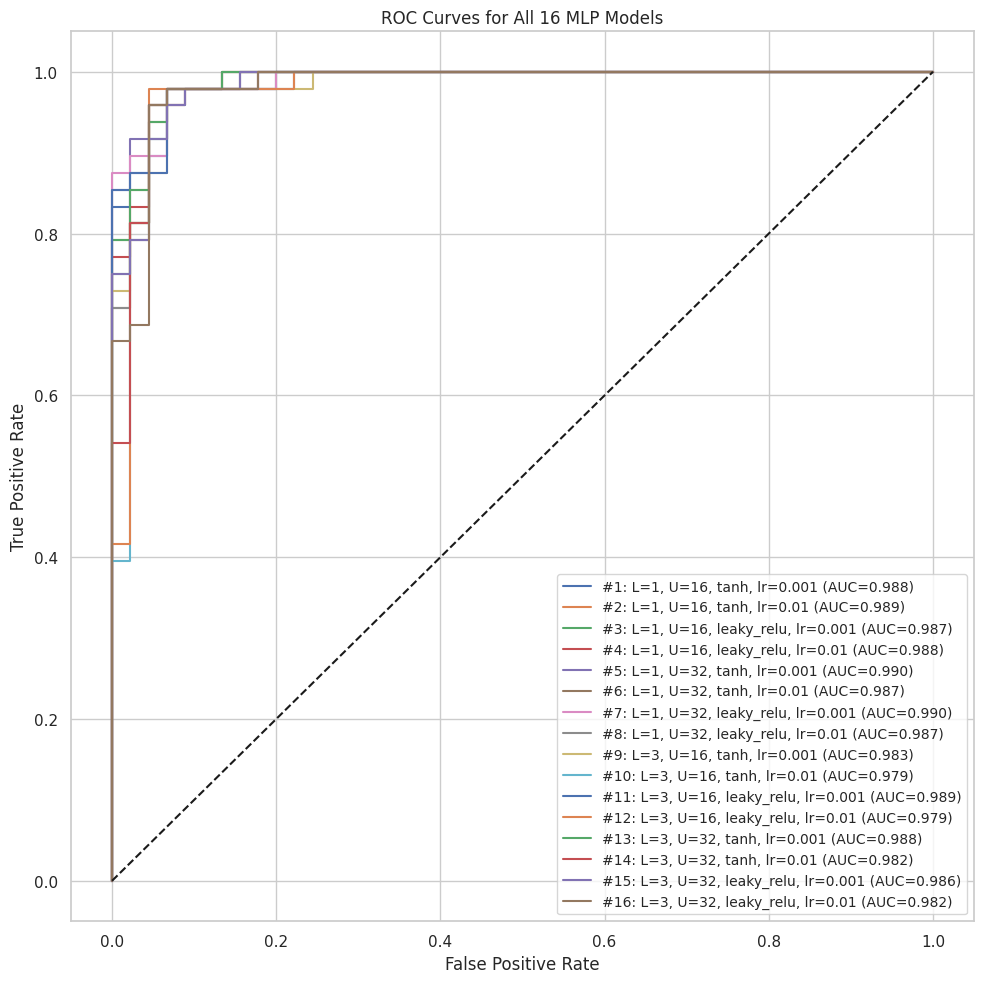

In [56]:
# Plot ROC curves for all 16 MLP models

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
for i, result in enumerate(test_results):
    # Rebuild and retrain the model with the same config
    model = FlexibleMLP(
        input_dim=X_train_tensor.shape[1],
        hidden_layers=result['Hidden Layers'],
        hidden_units=result['Hidden Units'],
        activation=result['Activation']
    )
    optimizer = torch.optim.Adam(model.parameters(), lr=result['Learning Rate'])
    criterion = nn.BCELoss()
    trained_model = train_model(model, optimizer, criterion, X_train_tensor, y_train_tensor, epochs=100)

    # Predict probabilities
    trained_model.eval()
    with torch.no_grad():
        y_prob = trained_model(X_test_tensor).numpy()
        y_true = y_test_tensor.numpy()

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    label = f"#{i+1}: L={result['Hidden Layers']}, U={result['Hidden Units']}, {result['Activation']}, lr={result['Learning Rate']} (AUC={roc_auc:.3f})"
    plt.plot(fpr, tpr, label=label)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All 16 MLP Models')
plt.legend(fontsize='small', loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

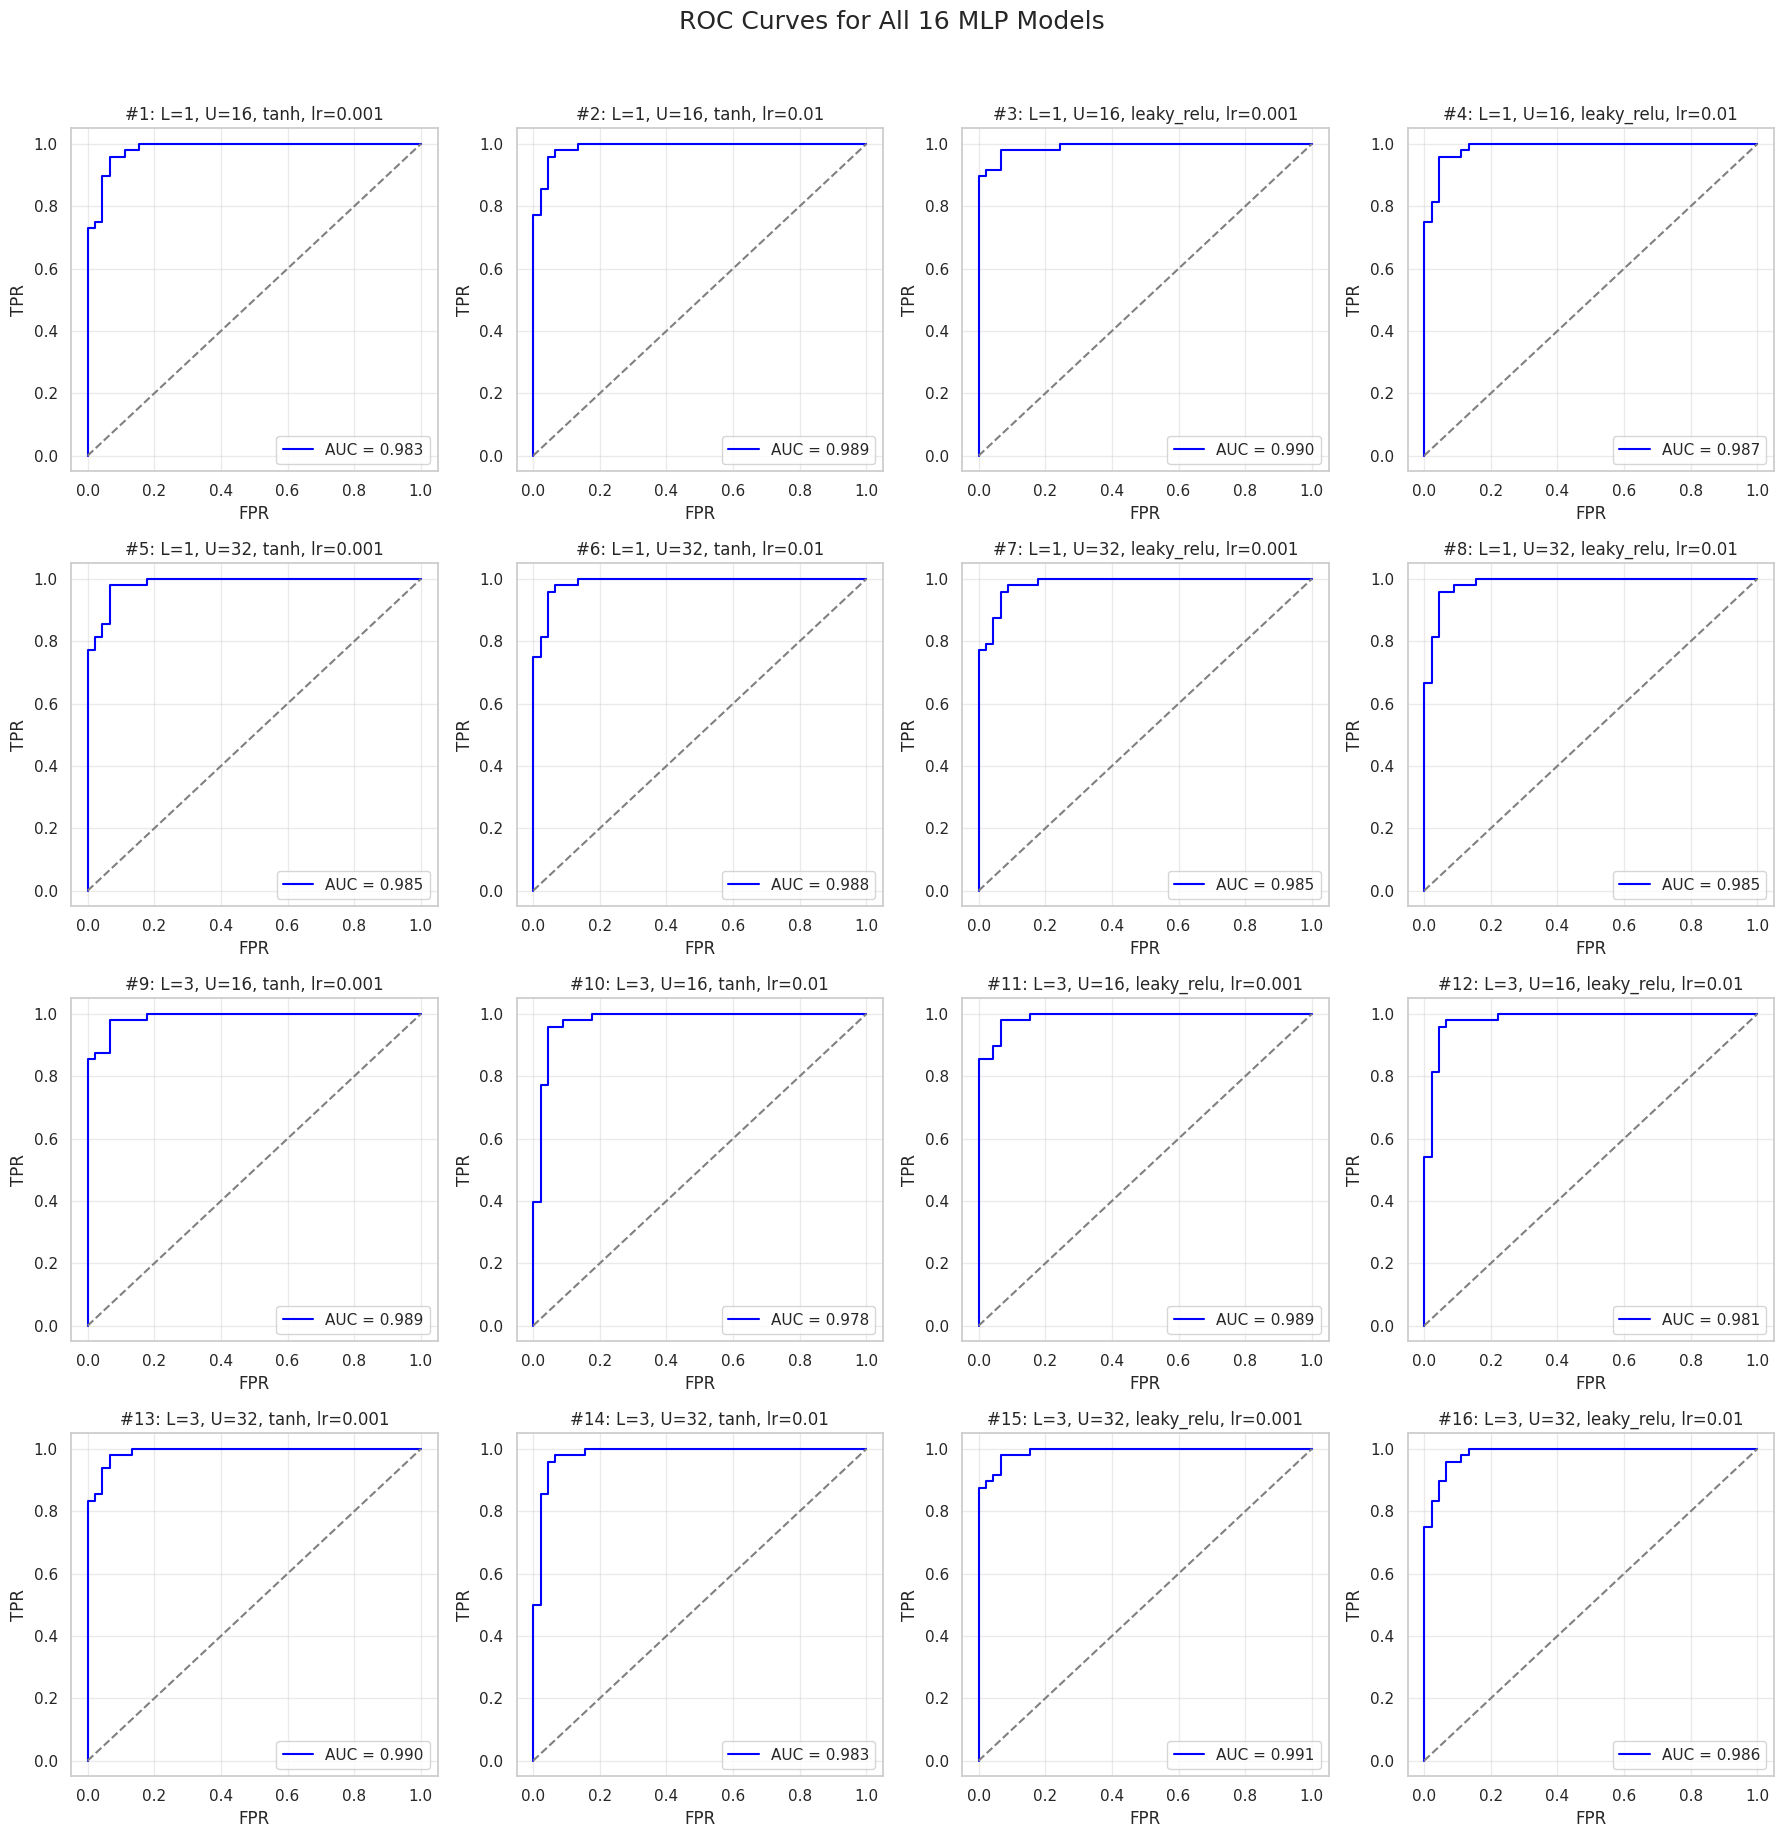

In [59]:
# Plot ROC Curves for All 16 MLP Models in 4x4 Grid

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fig, axes = plt.subplots(4, 4, figsize=(18, 18))
axes = axes.ravel()

for i, result in enumerate(test_results):
    # Rebuild model with same hyperparameters
    model = FlexibleMLP(
        input_dim=X_train_tensor.shape[1],
        hidden_layers=result['Hidden Layers'],
        hidden_units=result['Hidden Units'],
        activation=result['Activation']
    )
    optimizer = torch.optim.Adam(model.parameters(), lr=result['Learning Rate'])
    criterion = nn.BCELoss()
    trained_model = train_model(model, optimizer, criterion, X_train_tensor, y_train_tensor, epochs=100)

    # Predict probabilities
    trained_model.eval()
    with torch.no_grad():
        y_prob = trained_model(X_test_tensor).numpy()
        y_true = y_test_tensor.numpy()

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC in subplot
    axes[i].plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.3f}")
    axes[i].plot([0, 1], [0, 1], linestyle='--', color='gray')
    axes[i].set_title(f"#{i+1}: L={result['Hidden Layers']}, U={result['Hidden Units']}, {result['Activation']}, lr={result['Learning Rate']}")
    axes[i].set_xlabel("FPR")
    axes[i].set_ylabel("TPR")
    axes[i].legend(loc='lower right')
    axes[i].grid(alpha=0.4)

# Layout adjustments
plt.suptitle("ROC Curves for All 16 MLP Models", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

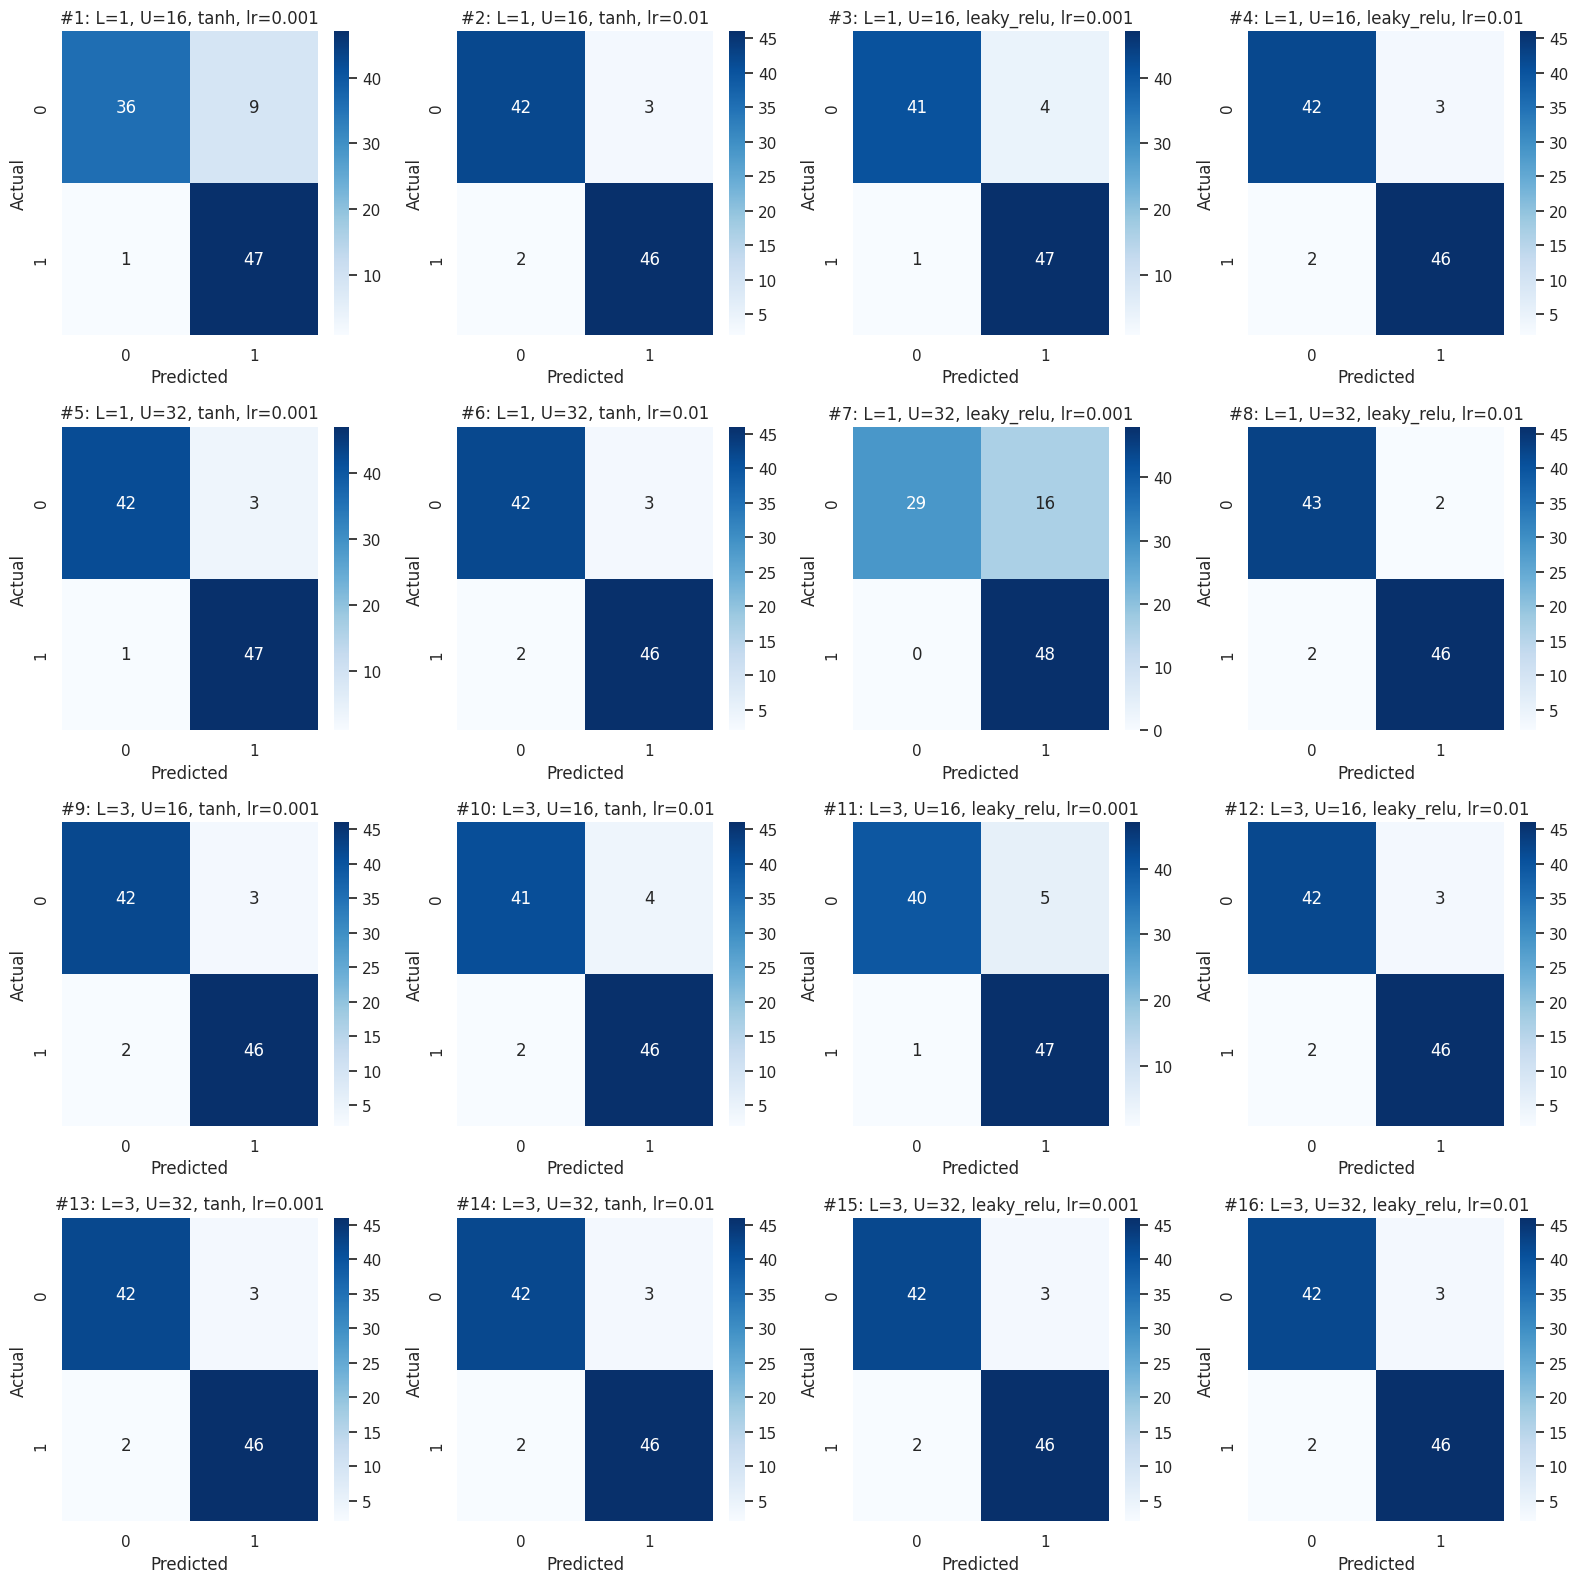

In [57]:
# Plot 16 confusion matrices in a grid (4x4)

from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.ravel()

for i, result in enumerate(test_results):
    # Rebuild and retrain the model with same hyperparameters
    model = FlexibleMLP(
        input_dim=X_train_tensor.shape[1],
        hidden_layers=result['Hidden Layers'],
        hidden_units=result['Hidden Units'],
        activation=result['Activation']
    )
    optimizer = torch.optim.Adam(model.parameters(), lr=result['Learning Rate'])
    criterion = nn.BCELoss()
    trained_model = train_model(model, optimizer, criterion, X_train_tensor, y_train_tensor, epochs=100)

    # Predict labels on test set
    trained_model.eval()
    with torch.no_grad():
        y_pred = (trained_model(X_test_tensor) >= 0.5).int().numpy()
        y_true = y_test_tensor.numpy()

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"#{i+1}: L={result['Hidden Layers']}, U={result['Hidden Units']}, {result['Activation']}, lr={result['Learning Rate']}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [62]:
# Define Flexible MLP class with Dropout support

import torch
import torch.nn as nn
import torch.nn.functional as F

class FlexibleMLP_Dropout(nn.Module):
    def __init__(self, input_dim, hidden_layers, hidden_units, activation, dropout_rate=0.3):
        """
        input_dim     : int, number of input features
        hidden_layers : int, number of hidden layers
        hidden_units  : int, number of neurons in each hidden layer
        activation    : str, 'tanh' or 'leaky_relu'
        dropout_rate  : float, dropout probability (e.g., 0.3)
        """
        super(FlexibleMLP_Dropout, self).__init__()

        # Choose activation function
        if activation == 'tanh':
            self.activation_fn = torch.tanh
        elif activation == 'leaky_relu':
            self.activation_fn = F.leaky_relu
        else:
            raise ValueError("Unsupported activation function. Use 'tanh' or 'leaky_relu'.")

        # Hidden layers with dropout
        self.hidden = nn.ModuleList()
        self.dropout = nn.Dropout(dropout_rate)
        last_dim = input_dim

        for _ in range(hidden_layers):
            self.hidden.append(nn.Linear(last_dim, hidden_units))
            last_dim = hidden_units

        # Output layer (binary classification)
        self.output = nn.Linear(last_dim, 1)

    def forward(self, x):
        for layer in self.hidden:
            x = self.activation_fn(layer(x))
            x = self.dropout(x)  # Apply dropout after activation
        return torch.sigmoid(self.output(x))  # Binary output (probability)

In [63]:
# Train and Evaluate MLP with Dropout Only (No L2 Regularization)
# ---------------------------------------------------------------
# This configuration is based on the MLP model (Model #5 in the 16 tested models)
# that showed signs of overfitting: high F1 and AUC on the training set but relatively lower on test.
# Selected configuration:
# - Hidden Layers: 3
# - Hidden Units : 16
# - Activation   : leaky_relu
# - Learning Rate: 0.01
# This model had F1=0.9717 (Train) vs F1=0.9484 (Test) and AUC=0.9940 vs 0.9861

import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score

# Set the overfitted model's configuration
best_config_dropout = {
    'input_dim': X_train_tensor.shape[1],
    'hidden_layers': 3,
    'hidden_units': 16,
    'activation': 'leaky_relu',
    'dropout_rate': 0.3,
    'learning_rate': 0.01
}

# Initialize model with Dropout
model_dropout_only = FlexibleMLP_Dropout(
    input_dim=best_config_dropout['input_dim'],
    hidden_layers=best_config_dropout['hidden_layers'],
    hidden_units=best_config_dropout['hidden_units'],
    activation=best_config_dropout['activation'],
    dropout_rate=best_config_dropout['dropout_rate']
)

# Optimizer without L2 (weight_decay=0)
optimizer = torch.optim.Adam(
    model_dropout_only.parameters(),
    lr=best_config_dropout['learning_rate']
)

# Binary Cross-Entropy Loss for binary classification
criterion = nn.BCELoss()

# Train the model
model_dropout_only = train_model(
    model_dropout_only, optimizer, criterion,
    X_train_tensor, y_train_tensor, epochs=100
)

# Evaluate on both train and test sets
metrics_dropout_train = evaluate_model(model_dropout_only, X_train_tensor, y_train_tensor)
metrics_dropout_test  = evaluate_model(model_dropout_only, X_test_tensor,  y_test_tensor)

# Display comparison table
print("Train vs. Test Metrics for MLP with Dropout (No L2):")
print(f"{'Metric':<12} | {'Train':>10} | {'Test':>10}")
print("-" * 36)
for metric in metrics_dropout_test:
    train_val = metrics_dropout_train[metric]
    test_val  = metrics_dropout_test[metric]
    print(f"{metric:<12} | {train_val:10.4f} | {test_val:10.4f}")

Train vs. Test Metrics for MLP with Dropout (No L2):
Metric       |      Train |       Test
------------------------------------
Accuracy     |     0.9684 |     0.9355
Precision    |     0.9406 |     0.9200
Recall       |     1.0000 |     0.9583
F1 Score     |     0.9694 |     0.9388
F2 Score     |     0.9875 |     0.9504
AUC          |     0.9929 |     0.9847


In [64]:
# Train and Evaluate MLP with Only L2 Regularization (No Dropout)
# ------------------------------------------------------------------
# This configuration mirrors the same overfitted model (#5) from previous evaluation:
# - Hidden Layers : 3
# - Hidden Units  : 16
# - Activation    : leaky_relu
# - Learning Rate : 0.01
# - Regularization: L2 Only (weight_decay=0.01)
# Goal: Evaluate the effect of L2 regularization alone in reducing overfitting.

import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score

# Set the same configuration as the overfitted model #5
best_config_l2 = {
    'input_dim': X_train_tensor.shape[1],
    'hidden_layers': 3,
    'hidden_units': 16,
    'activation': 'leaky_relu',
    'learning_rate': 0.01,
    'weight_decay': 0.01  # L2 regularization only
}

# Initialize standard MLP without Dropout
model_l2_only = FlexibleMLP(
    input_dim=best_config_l2['input_dim'],
    hidden_layers=best_config_l2['hidden_layers'],
    hidden_units=best_config_l2['hidden_units'],
    activation=best_config_l2['activation']
)

# Optimizer with weight_decay to apply L2 regularization
optimizer = torch.optim.Adam(
    model_l2_only.parameters(),
    lr=best_config_l2['learning_rate'],
    weight_decay=best_config_l2['weight_decay']  # L2 penalty
)

# Binary cross-entropy loss
criterion = nn.BCELoss()

# Train the model
model_l2_only = train_model(
    model_l2_only, optimizer, criterion,
    X_train_tensor, y_train_tensor, epochs=100
)

# Evaluate on both train and test sets
metrics_l2_train = evaluate_model(model_l2_only, X_train_tensor, y_train_tensor)
metrics_l2_test  = evaluate_model(model_l2_only, X_test_tensor,  y_test_tensor)

# Display results
print("Train vs. Test Metrics for MLP with Only L2 Regularization (No Dropout):")
print(f"{'Metric':<12} | {'Train':>10} | {'Test':>10}")
print("-" * 36)
for metric in metrics_l2_test:
    train_val = metrics_l2_train[metric]
    test_val  = metrics_l2_test[metric]
    print(f"{metric:<12} | {train_val:10.4f} | {test_val:10.4f}")

Train vs. Test Metrics for MLP with Only L2 Regularization (No Dropout):
Metric       |      Train |       Test
------------------------------------
Accuracy     |     0.9553 |     0.9462
Precision    |     0.9482 |     0.9388
Recall       |     0.9632 |     0.9583
F1 Score     |     0.9556 |     0.9485
F2 Score     |     0.9601 |     0.9544
AUC          |     0.9919 |     0.9898


In [65]:
# Train and Evaluate MLP with Dropout + L2 Regularization
# ----------------------------------------------------------
# This model is based on a configuration that previously showed signs of overfitting.
# Here, both Dropout and L2 Regularization are applied to reduce overfitting and improve generalization.
# Configuration:
# - Hidden Layers: 1
# - Hidden Units : 32
# - Activation   : tanh
# - Dropout Rate : 0.3
# - Learning Rate: 0.001
# - L2 Regularization: weight_decay=0.01

import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score

# Configuration dictionary for the regularized model
best_config_combined = {
    'input_dim': X_train_tensor.shape[1],
    'hidden_layers': 1,
    'hidden_units': 32,
    'activation': 'tanh',
    'dropout_rate': 0.3,
    'learning_rate': 0.001,
    'weight_decay': 0.01
}

# Initialize model with Dropout
model_combined = FlexibleMLP_Dropout(
    input_dim=best_config_combined['input_dim'],
    hidden_layers=best_config_combined['hidden_layers'],
    hidden_units=best_config_combined['hidden_units'],
    activation=best_config_combined['activation'],
    dropout_rate=best_config_combined['dropout_rate']
)

# Optimizer with L2 regularization via weight_decay
optimizer = torch.optim.Adam(
    model_combined.parameters(),
    lr=best_config_combined['learning_rate'],
    weight_decay=best_config_combined['weight_decay']
)

# Use Binary Cross-Entropy Loss
criterion = nn.BCELoss()

# Train the model
model_combined = train_model(
    model_combined, optimizer, criterion,
    X_train_tensor, y_train_tensor, epochs=100
)

# Evaluate on both Train and Test sets
metrics_combined_train = evaluate_model(model_combined, X_train_tensor, y_train_tensor)
metrics_combined_test  = evaluate_model(model_combined, X_test_tensor,  y_test_tensor)

# Display results
print("Train vs. Test Metrics for MLP with Dropout + L2 Regularization:")
print(f"{'Metric':<12} | {'Train':>10} | {'Test':>10}")
print("-" * 36)
for metric in metrics_combined_test:
    train_val = metrics_combined_train[metric]
    test_val  = metrics_combined_test[metric]
    print(f"{metric:<12} | {train_val:10.4f} | {test_val:10.4f}")

Train vs. Test Metrics for MLP with Dropout + L2 Regularization:
Metric       |      Train |       Test
------------------------------------
Accuracy     |     0.9579 |     0.9355
Precision    |     0.9223 |     0.9038
Recall       |     1.0000 |     0.9792
F1 Score     |     0.9596 |     0.9400
F2 Score     |     0.9834 |     0.9631
AUC          |     0.9888 |     0.9870


In [69]:
# Final Comparison Table for All Models (Train vs. Test Metrics)
# ------------------------------------------------------------------
# This compares four MLP models:
# 1) Baseline (from model #5 in 16-grid search, manually entered),
# 2) Dropout Only,
# 3) L2 Only,
# 4) Dropout + L2.
# Metrics: Accuracy, Precision, Recall, F1, F2, AUC on Train & Test sets.
# The table is sorted by F1 Score on the test set.

import pandas as pd

# Manually extracted from earlier 16-model grid (Model #5, overfitted one)
metrics_baseline_train = {
    'Accuracy': 0.9711,
    'Precision': 0.9497,
    'Recall': 0.9947,
    'F1 Score': 0.9717,
    'F2 Score': 0.9854,
    'AUC': 0.9940
}

metrics_baseline_test = {
    'Accuracy': 0.9462,
    'Precision': 0.9388,
    'Recall': 0.9583,
    'F1 Score': 0.9485,
    'F2 Score': 0.9544,
    'AUC': 0.9861
}

# All evaluated models with available metrics
all_metrics = [
    ('Baseline (No Regularization)', metrics_baseline_train, metrics_baseline_test),
    ('Dropout Only', metrics_dropout_train, metrics_dropout_test),
    ('L2 Only', metrics_l2_train, metrics_l2_test),
    ('Dropout + L2', metrics_combined_train, metrics_combined_test),
]

# Build a list of rows by combining metrics
rows = []
for name, train_dict, test_dict in all_metrics:
    row = {'Model': name}
    for metric in train_dict:
        row[f'{metric}_Train'] = round(train_dict[metric], 4)
        row[f'{metric}_Test']  = round(test_dict[metric], 4)
    rows.append(row)

# Build final DataFrame
comparison_df = pd.DataFrame(rows)

# Order columns logically
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC']
ordered_cols = ['Model'] + [f'{m}_{s}' for m in metric_names for s in ['Train', 'Test']]
comparison_df = comparison_df[ordered_cols]

# Sort by F1 Score on test data
comparison_df = comparison_df.sort_values(by='F1 Score_Test', ascending=False).reset_index(drop=True)

# Apply style and format for better readability
styled_df = comparison_df.style \
    .set_caption("Final Comparison of All MLP Models (Sorted by Test F1 Score)") \
    .format(precision=4) \
    .background_gradient(subset=[col for col in comparison_df.columns if col != 'Model'], cmap='YlGnBu') \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]}])

# Display styled table
styled_df

,Model,Accuracy_Train,Accuracy_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,F1 Score_Train,F1 Score_Test,F2 Score_Train,F2 Score_Test,AUC_Train,AUC_Test
0,Baseline (No Regularization),0.9711,0.9462,0.9497,0.9388,0.9947,0.9583,0.9717,0.9485,0.9854,0.9544,0.9940,0.9861
1,L2 Only,0.9553,0.9462,0.9482,0.9388,0.9632,0.9583,0.9556,0.9485,0.9601,0.9544,0.9919,0.9898
2,Dropout + L2,0.9579,0.9355,0.9223,0.9038,1.0000,0.9792,0.9596,0.9400,0.9834,0.9631,0.9888,0.9870
3,Dropout Only,0.9684,0.9355,0.9406,0.9200,1.0000,0.9583,0.9694,0.9388,0.9875,0.9504,0.9929,0.9847


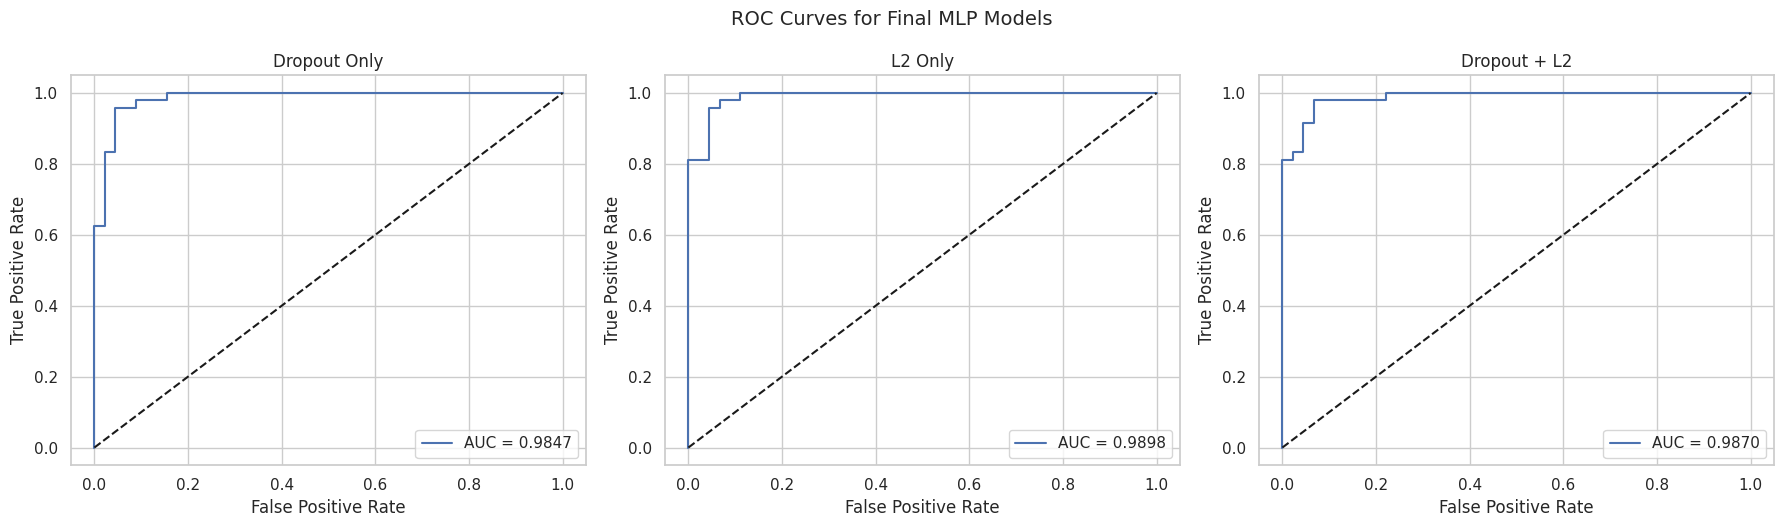

In [72]:
# 📈 ROC Curves for 3 Final Models (1x3 Layout)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Only the 3 trained models
models_probs = [
    ('Dropout Only', model_dropout_only, X_test_tensor),
    ('L2 Only', model_l2_only, X_test_tensor),
    ('Dropout + L2', model_combined, X_test_tensor)
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.ravel()

for idx, (name, model, X_input) in enumerate(models_probs):
    model.eval()
    with torch.no_grad():
        y_prob = model(X_input).numpy()
        y_true = y_test_tensor.numpy()

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    axes[idx].plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    axes[idx].plot([0, 1], [0, 1], 'k--')
    axes[idx].set_title(name)
    axes[idx].set_xlabel("False Positive Rate")
    axes[idx].set_ylabel("True Positive Rate")
    axes[idx].legend()
    axes[idx].grid(True)

plt.tight_layout()
plt.suptitle("ROC Curves for Final MLP Models", fontsize=14, y=1.05)
plt.show()

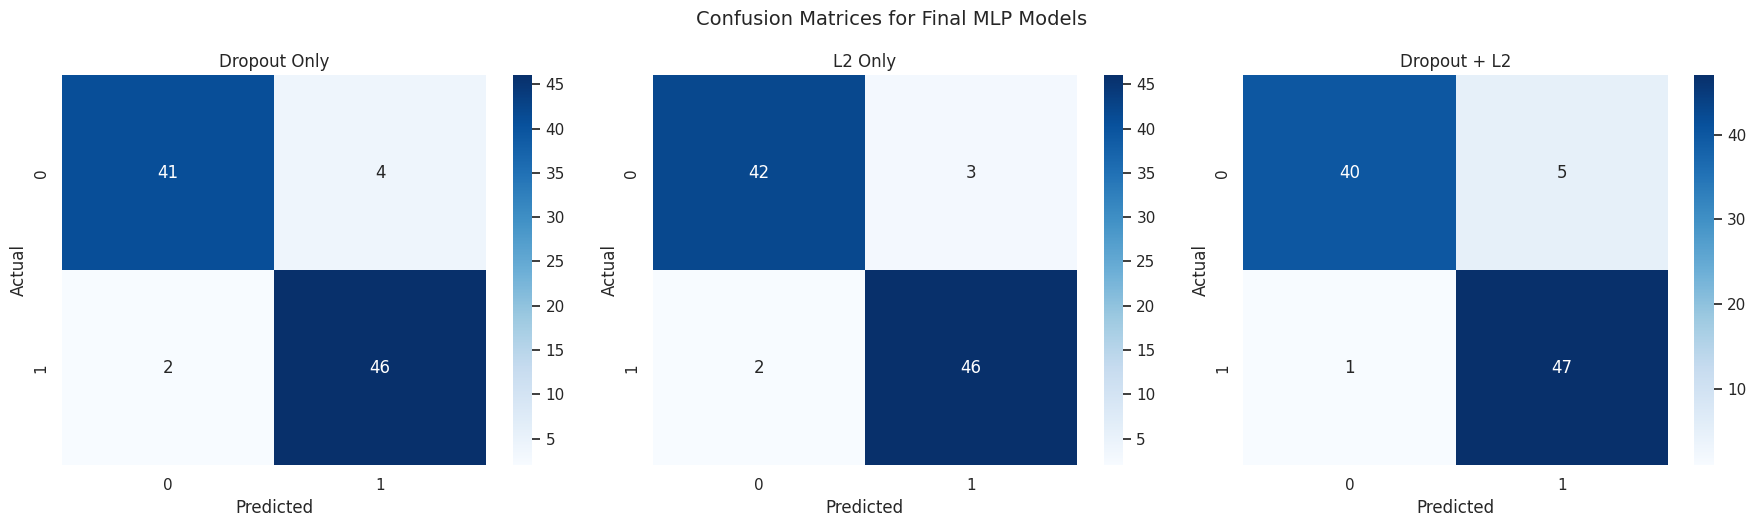

In [73]:
# 📊 Confusion Matrices for 3 Final Models (1x3 Layout)

from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.ravel()

for idx, (name, model, X_input) in enumerate(models_probs):
    model.eval()
    with torch.no_grad():
        y_pred = (model(X_input) >= 0.5).int().numpy()
        y_true = y_test_tensor.numpy()

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.suptitle("Confusion Matrices for Final MLP Models", fontsize=14, y=1.05)
plt.show()